# Exploratory Data Analysis (EDA) for Economic Time Series

## **Objective**
The primary goal of this Exploratory Data Analysis (EDA) is to understand the behavior and relationships of key economic time series data, with a specific focus on **inflation** as the target variable. This analysis will provide insights into the temporal patterns, variability, and potential relationships among the predictors, serving as a foundation for future modeling efforts.

---

## **Data Overview**
We are working with several economic time series, including:
- Inflation (target variable)
- Exchange rates (official and unofficial)
- Money supply (M2)
- Key commodity prices
- Interest rates

The data spans multiple years, with monthly frequency, and has been cleaned to ensure consistent timestamps across all series.

---

## **EDA Approach**
The EDA is structured to cover the following key aspects:

1. **Statistical Summaries:**
   - Descriptive statistics for each variable (mean, median, standard deviation, etc.).
   - Identification of outliers and variability across the dataset.

2. **Time Series Visualizations:**
   - Individual time series plots to observe trends, seasonality, and anomalies.
   - Annual disaggregation to analyze patterns within each year.

3. **Missing Data Analysis:**
   - Ensuring no gaps or inconsistencies in the monthly timestamps.

4. **Distribution Analysis:**
   - Histograms and boxplots to examine the distribution of values and detect potential skewness or outliers.

5. **Correlation Analysis:**
   - Scatter plots and correlation matrices to evaluate relationships between variables and their relevance to the target variable.

6. **Stationarity Tests:**
   - Statistical tests (e.g., KPSS) to determine if the series are stationary, which is crucial for model selection and preparation.

7. **Autocorrelation and Partial Autocorrelation:**
   - ACF and PACF plots for each variable to explore temporal dependencies and potential seasonality.

---

## **Expected Outcomes**
- A comprehensive understanding of the underlying structure and dynamics of the data.
- Identification of key features and transformations required for effective modeling.
- Insights into the relationships between predictors and the target variable, guiding feature selection and engineering.

---

## **Tools and Libraries**
The analysis leverages the following Python libraries:
- **Pandas** for data manipulation.
- **Matplotlib** and **Seaborn** for visualizations.
- **Statsmodels** for time series analysis and statistical tests.
- **Numpy** for numerical operations.

---

**Note:** This notebook focuses solely on EDA. Modeling and predictive analysis will be covered in subsequent stages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset:
data = pd.read_csv("../data/processed/combined_cleaned_data.csv", sep=",", index_col=0, parse_dates=True)

# Sanity check:
print(data.head())

            Official Exchange Rate  Informal Exchange Rate  Inflation  \
2004-02-01                  2.9319                    2.94        0.1   
2004-03-01                  2.8976                    2.92        0.6   
2004-04-01                  2.8359                    2.84        0.9   
2004-05-01                  2.9197                    2.93        0.7   
2004-06-01                  2.9603                    2.97        0.6   

            Monetary Supply (M2)  Interest Rate   IPMP  IPMP Agropecuario  \
2004-02-01                 56.20          2.265  167.8              167.4   
2004-03-01                 59.50          2.400  183.7              184.7   
2004-04-01                 62.75          2.100  184.5              187.0   
2004-05-01                 62.30          2.420  181.9              180.8   
2004-06-01                 56.75          2.440  172.3              170.2   

            IPMP Metales  IPMP Petróleo  
2004-02-01         164.9          165.0  
2004-03-01    

In [3]:
#Renaming columns from Spanish to English:
data = data.rename(columns={"IPMP": "General IPMP", 
                            "IPMP Agropecuario": "Agriculture IPMP",
                            "IPMP Metales": "Metals IPMP",
                            "IPMP Petróleo": "Crude Oil IPMP"})

In [4]:
# Main Statistics:
print(data.describe())

       Official Exchange Rate  Informal Exchange Rate   Inflation  \
count              249.000000              249.000000  249.000000   
mean                72.414446              112.057410    2.411245   
std                184.397563              267.388847    3.004814   
min                  2.835900                2.840000    0.000000   
25%                  3.693400                3.740000    0.800000   
50%                  8.125500               11.800000    1.200000   
75%                 52.727100               58.000000    3.200000   
max                981.568200             1437.500000   25.500000   

       Monetary Supply (M2)  Interest Rate  General IPMP  Agriculture IPMP  \
count            249.000000     249.000000    249.000000        249.000000   
mean              39.789759      25.009096    238.461044        202.069076   
std               38.135290      23.865527     57.614459         49.796474   
min               -0.700000       2.100000    132.300000        11

In [5]:
# Check if the date range it's fully complete:
full_date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='MS') #MS means first day of the months

missing_dates = set(full_date_range) - set(data.index)
if missing_dates:
    print("Dates missing:")
    print(sorted(missing_dates))
else:
    print("No missing dates.")


No missing dates.


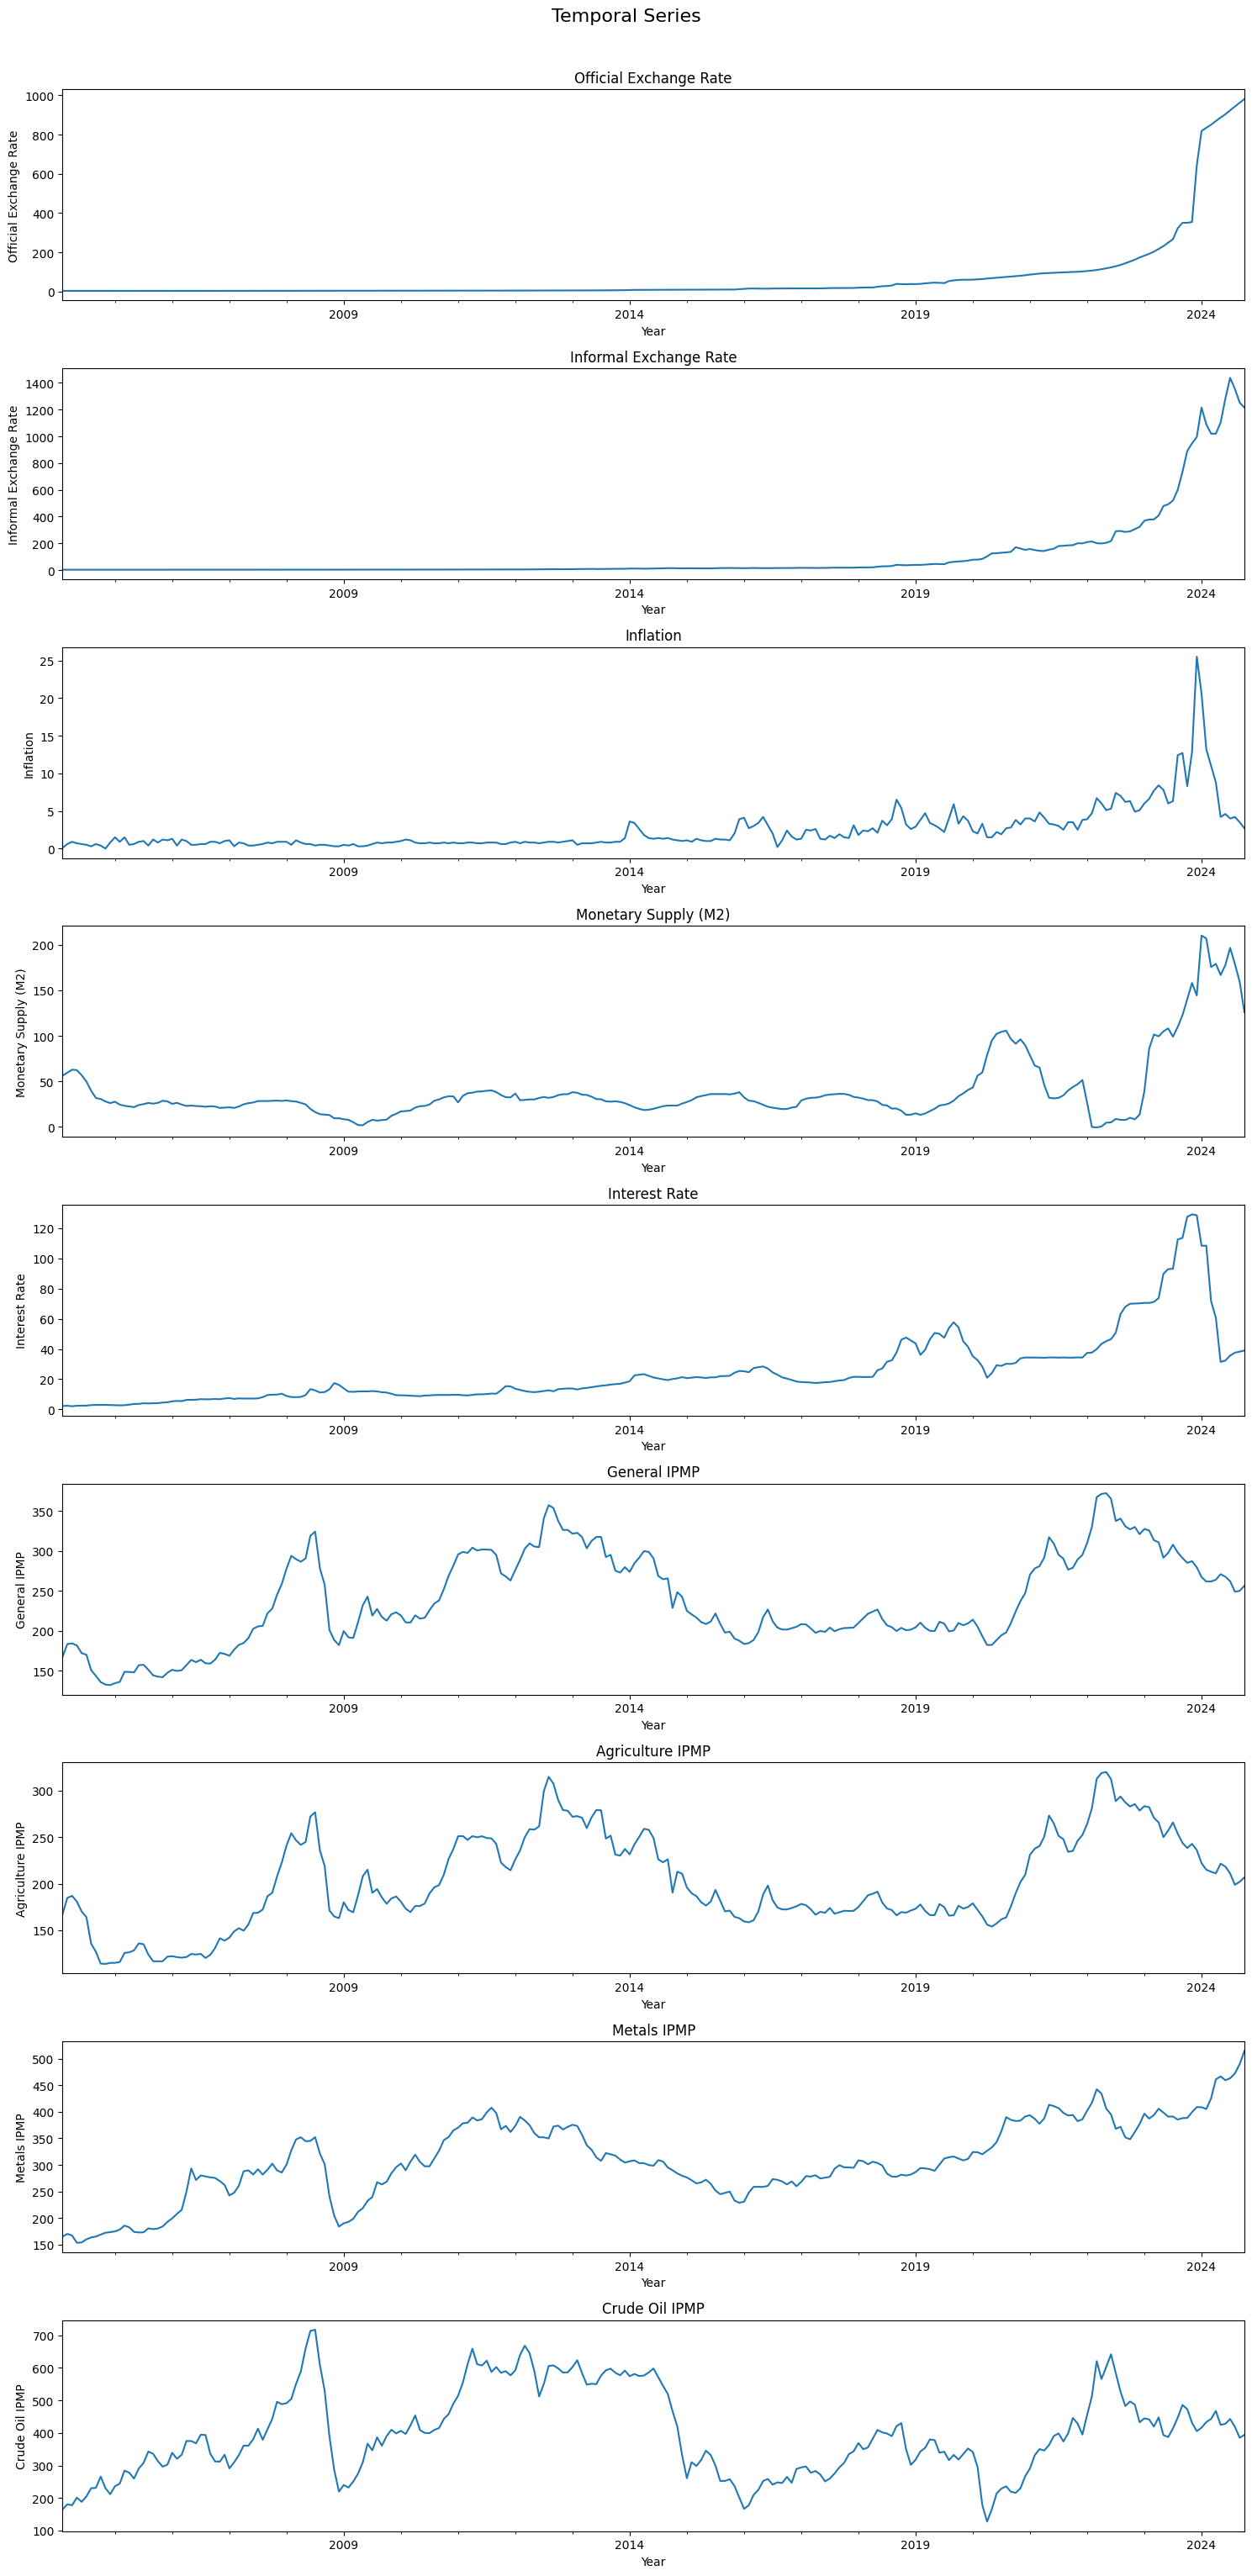

In [6]:
# Plot of every time serie's variable:
fig, axes = plt.subplots(nrows=data.shape[1], ncols=1, figsize=(15, 30))

for i, col in enumerate(data.columns):
    data[col].plot(ax=axes[i], title=col)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.suptitle("Temporal Series", y=1.02, fontsize=16)
plt.show()

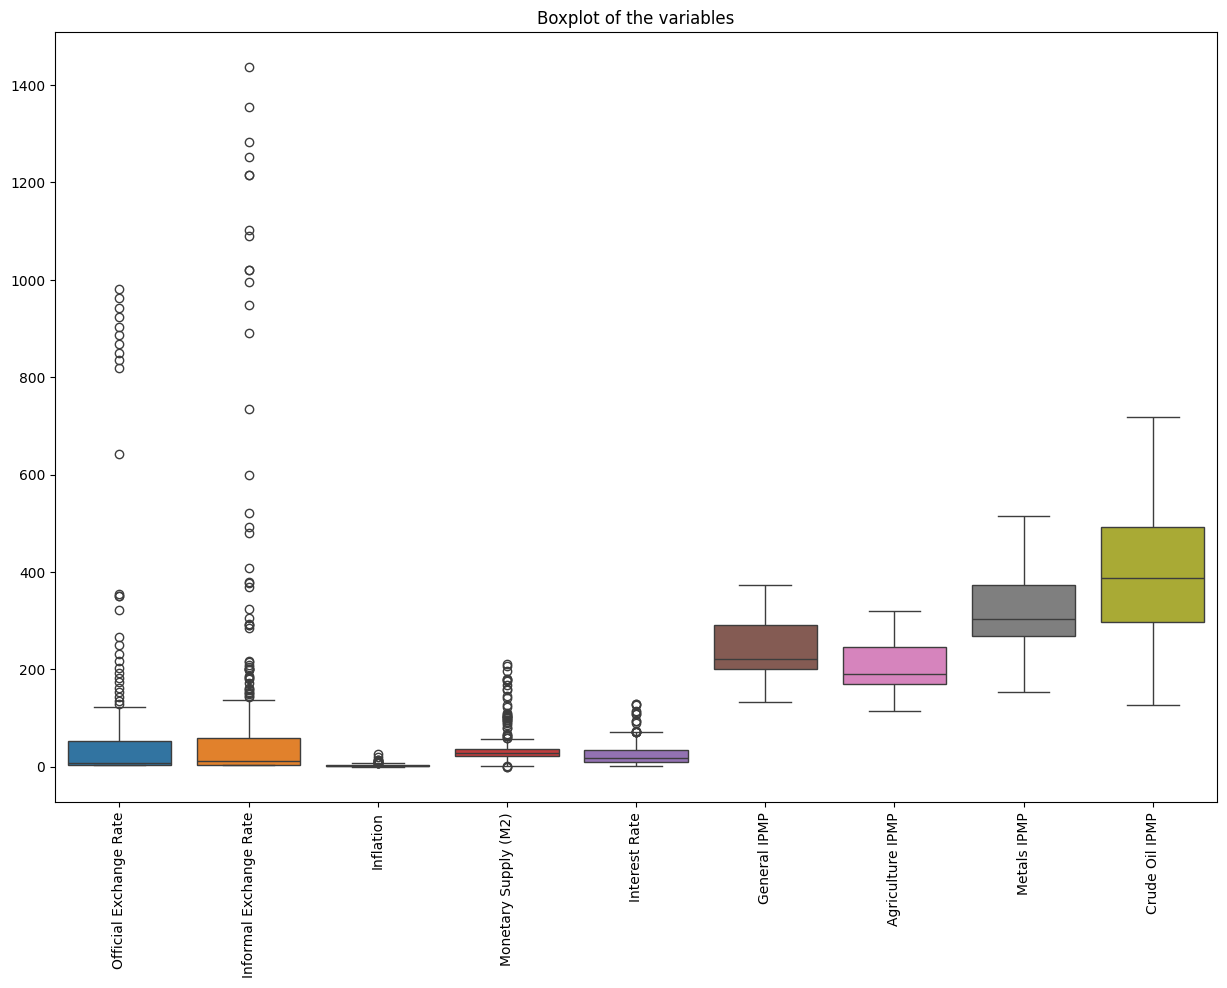

In [7]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.title("Boxplot of the variables")
plt.xticks(rotation=90)
plt.show()

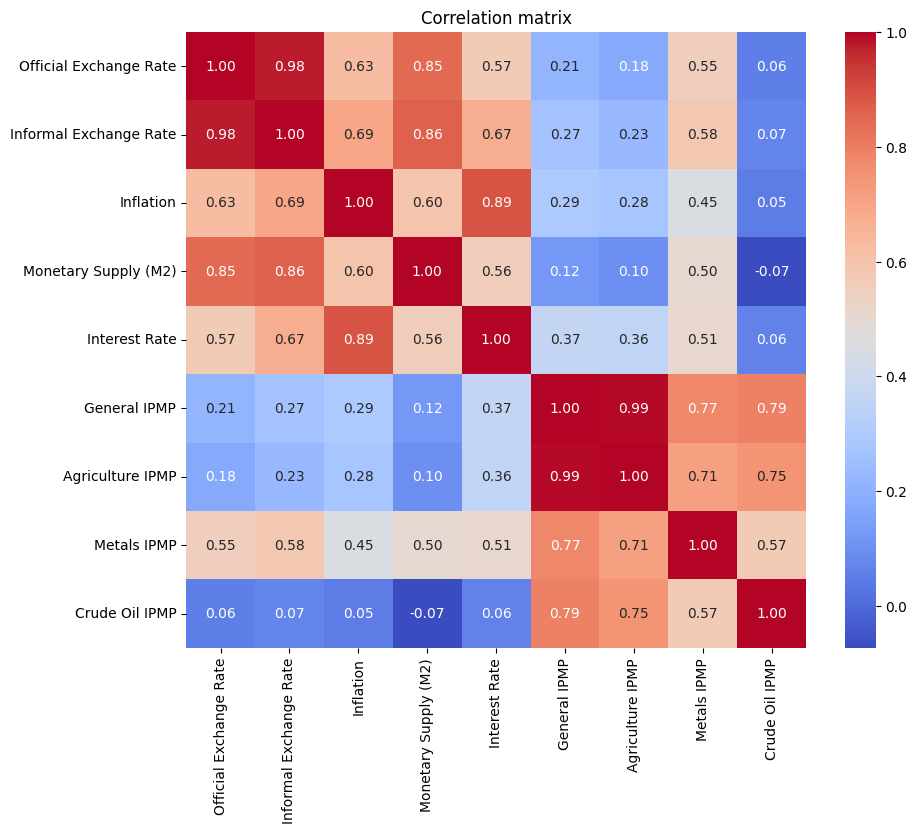

In [8]:
# Correlation matrix:
correlation_matrix = data.corr()

# Heatmap visualization:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()

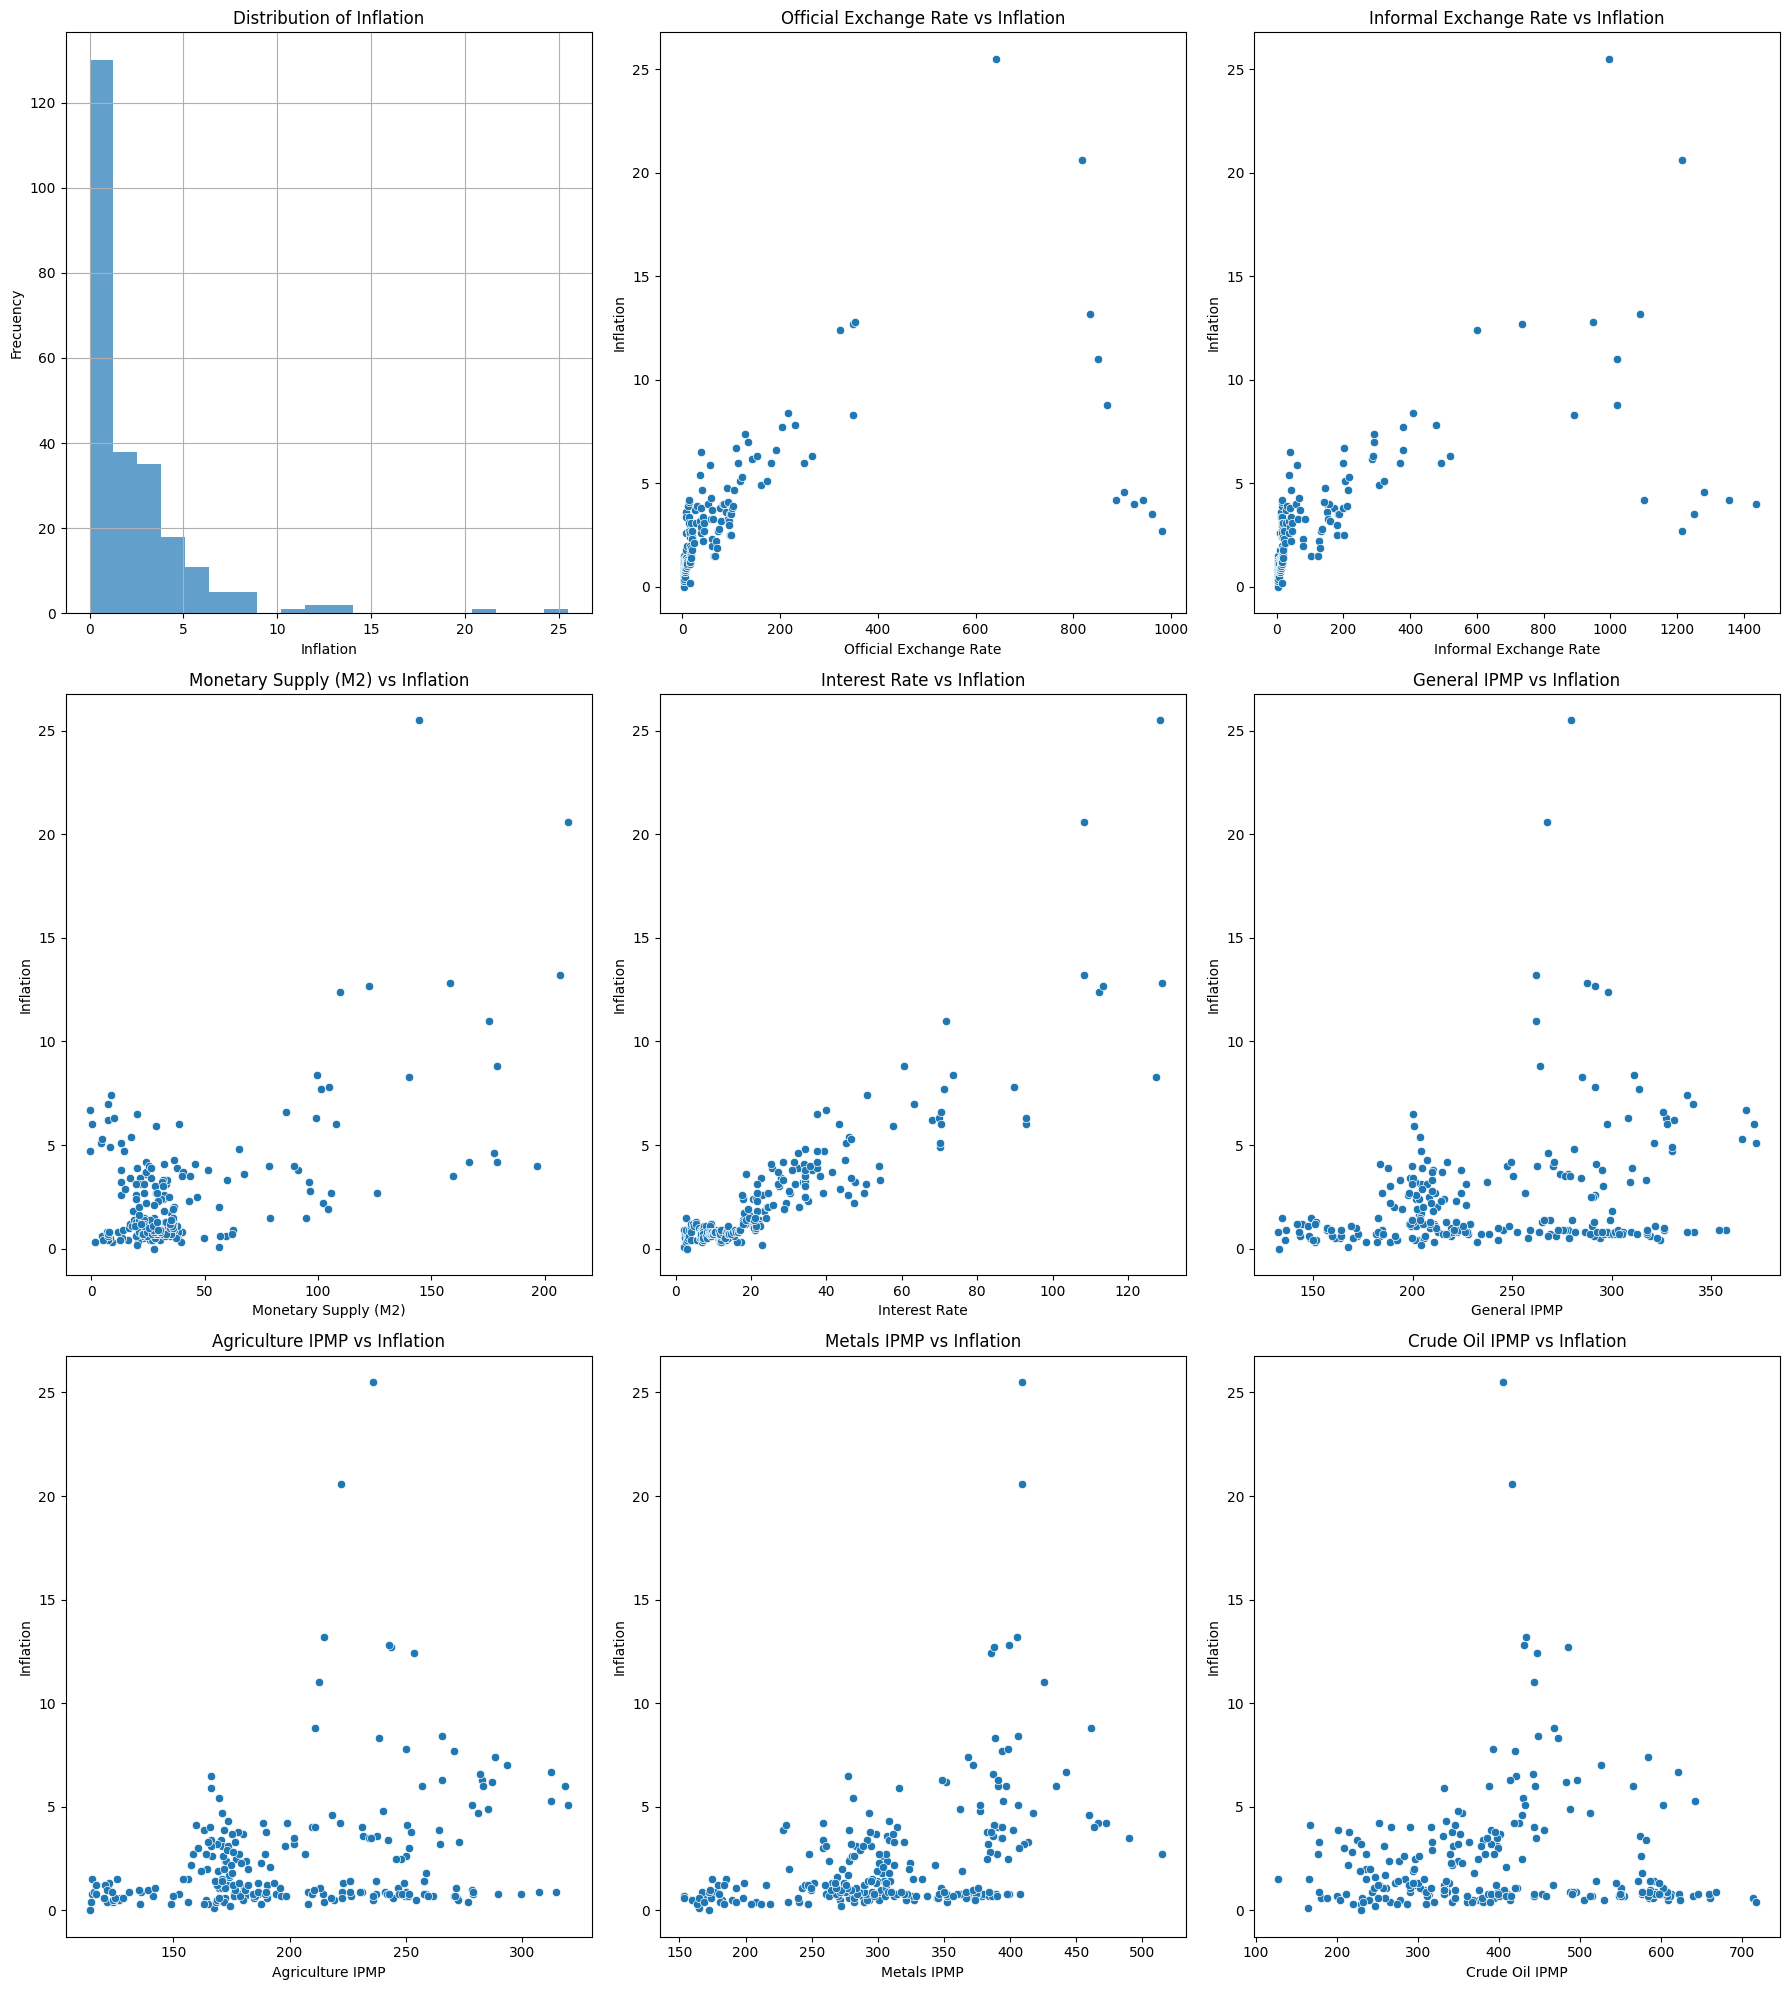

In [9]:
# Relationship between variables + Histogram of Inflation
target = 'Inflation'
predictors = data.columns.drop(target)

# Total number of graphics
total_plots = len(predictors) + 1  # +1 for the histogram

# Defining rows and columns:
rows = (total_plots // 3) + (total_plots % 3 > 0)
cols = 3

# Dinamic subplots:
fig, axes = plt.subplots(rows, cols, figsize=(18, 20))
axes = axes.flatten()

# Histogram:
data[target].hist(bins=20, ax=axes[0], alpha=0.7)
axes[0].set_title(f"Distribution of {target}")
axes[0].set_xlabel(target)
axes[0].set_ylabel("Frecuency")

# Relationship with other variables:
for i, col in enumerate(predictors, 1):
    sns.scatterplot(x=data[col], y=data[target], ax=axes[i])
    axes[i].set_title(f"{col} vs {target}")

# Remove empty subplots:
for j in range(len(predictors) + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


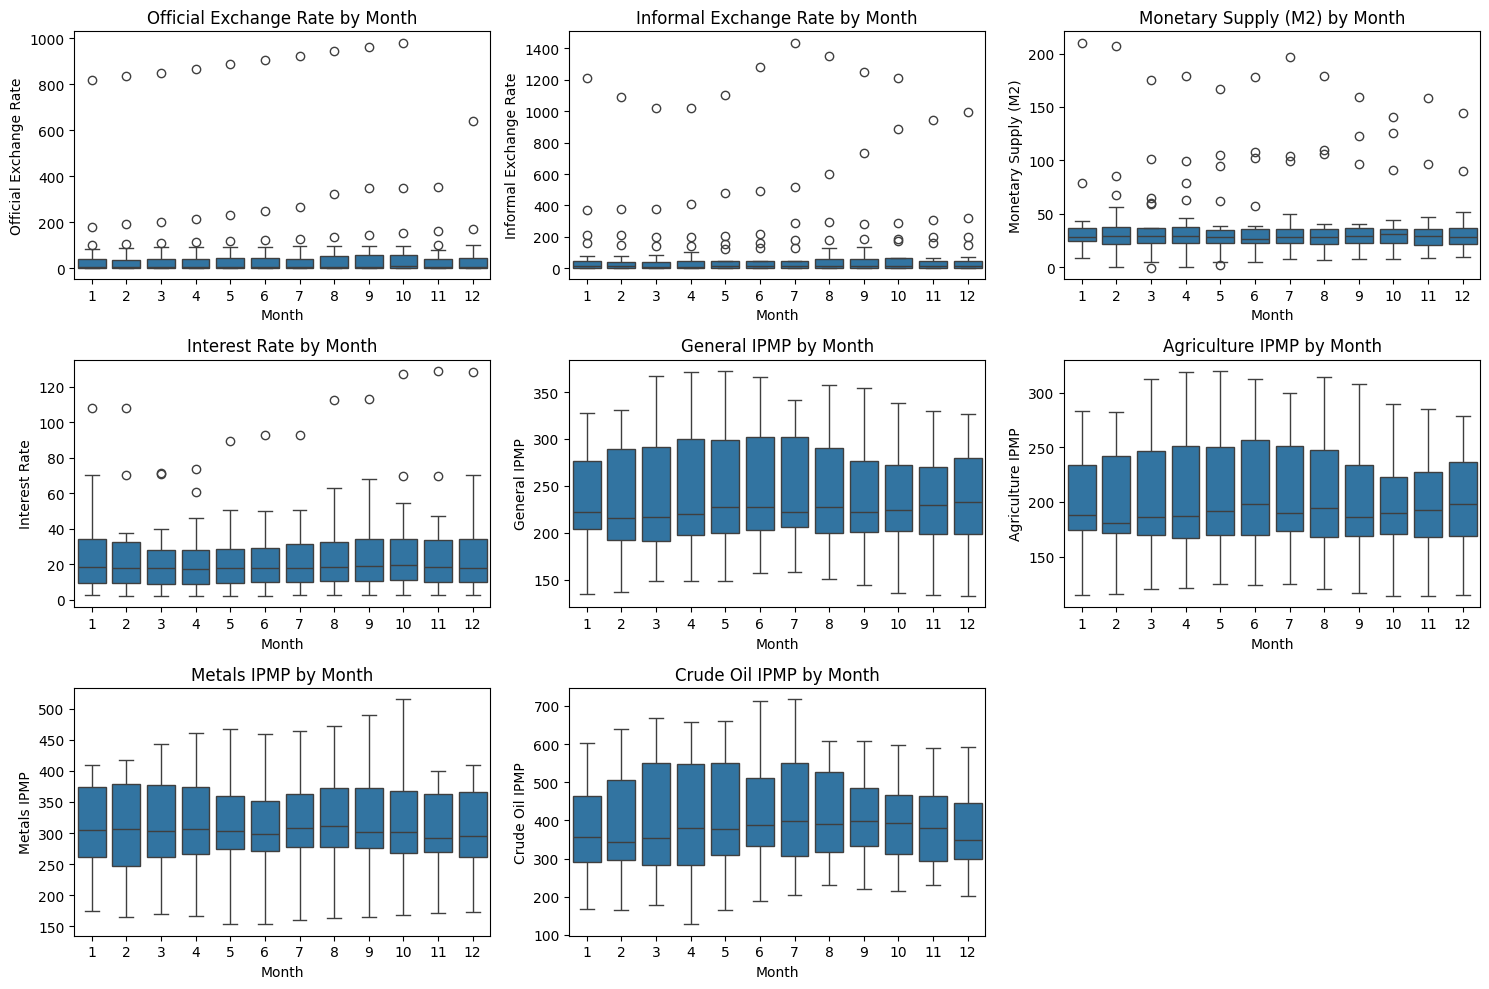

In [10]:
# Boxplot of each variable by month:
data['Month'] = data.index.month

variables = data.columns.drop(['Inflation', 'Month'])

plt.figure(figsize=(15, 10))
for i, col in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data['Month'], y=data[col])
    plt.title(f"{col} by Month")
    plt.xlabel("Month")
    plt.ylabel(col)
plt.tight_layout()
plt.show()


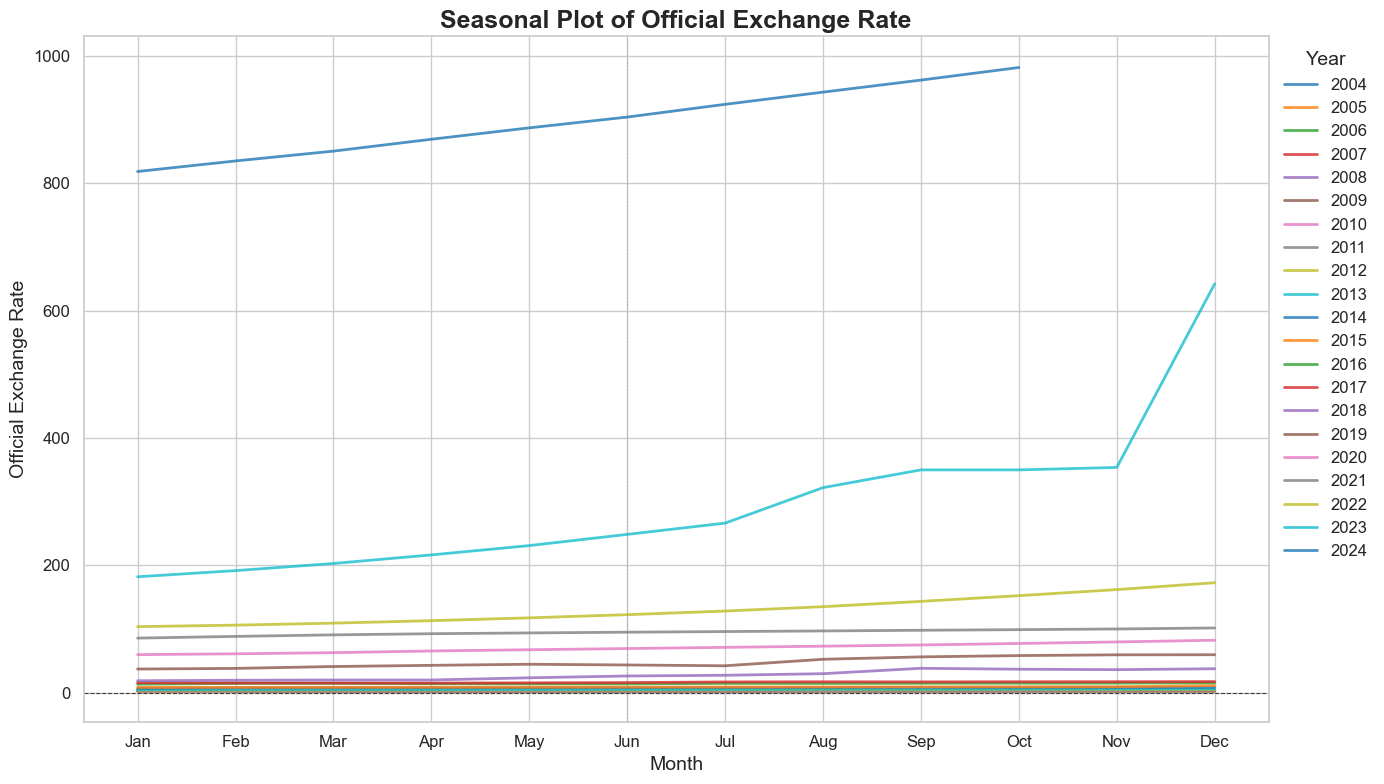

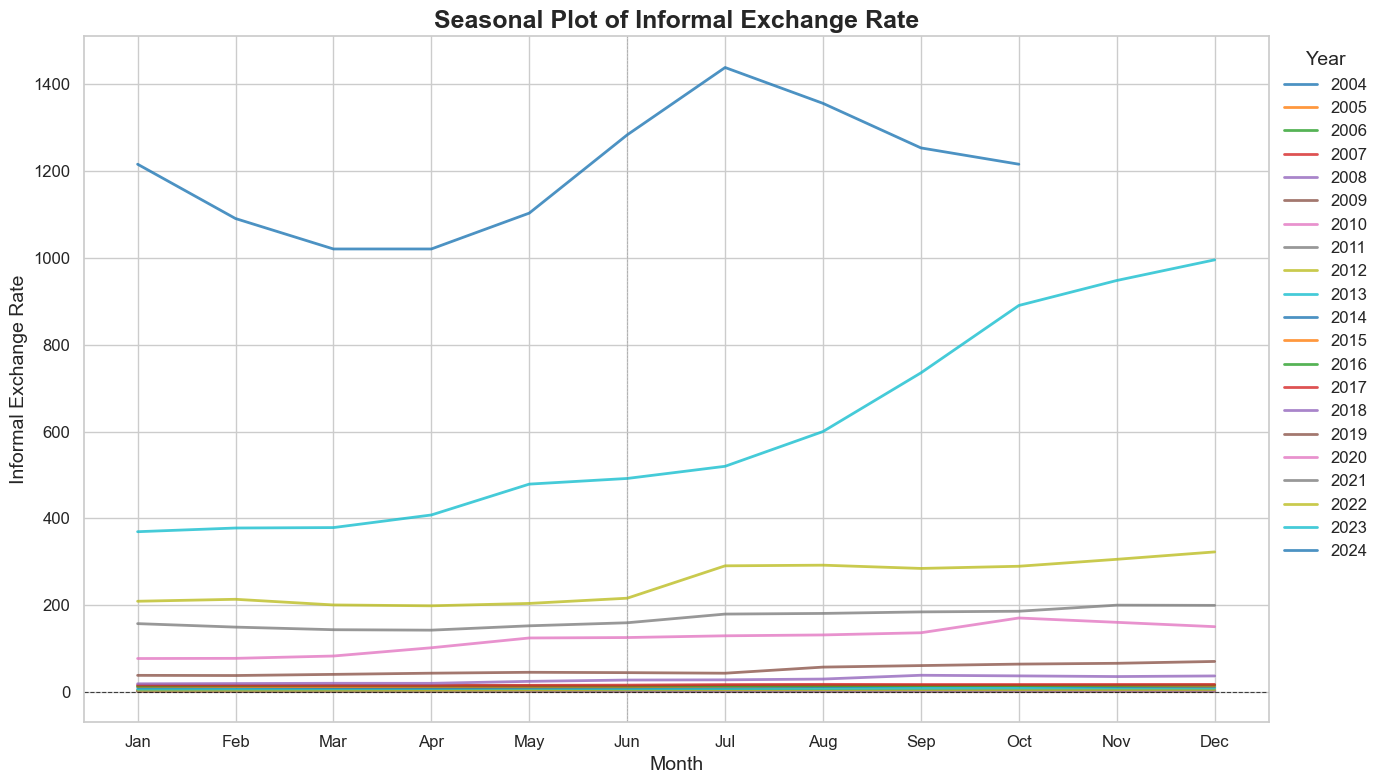

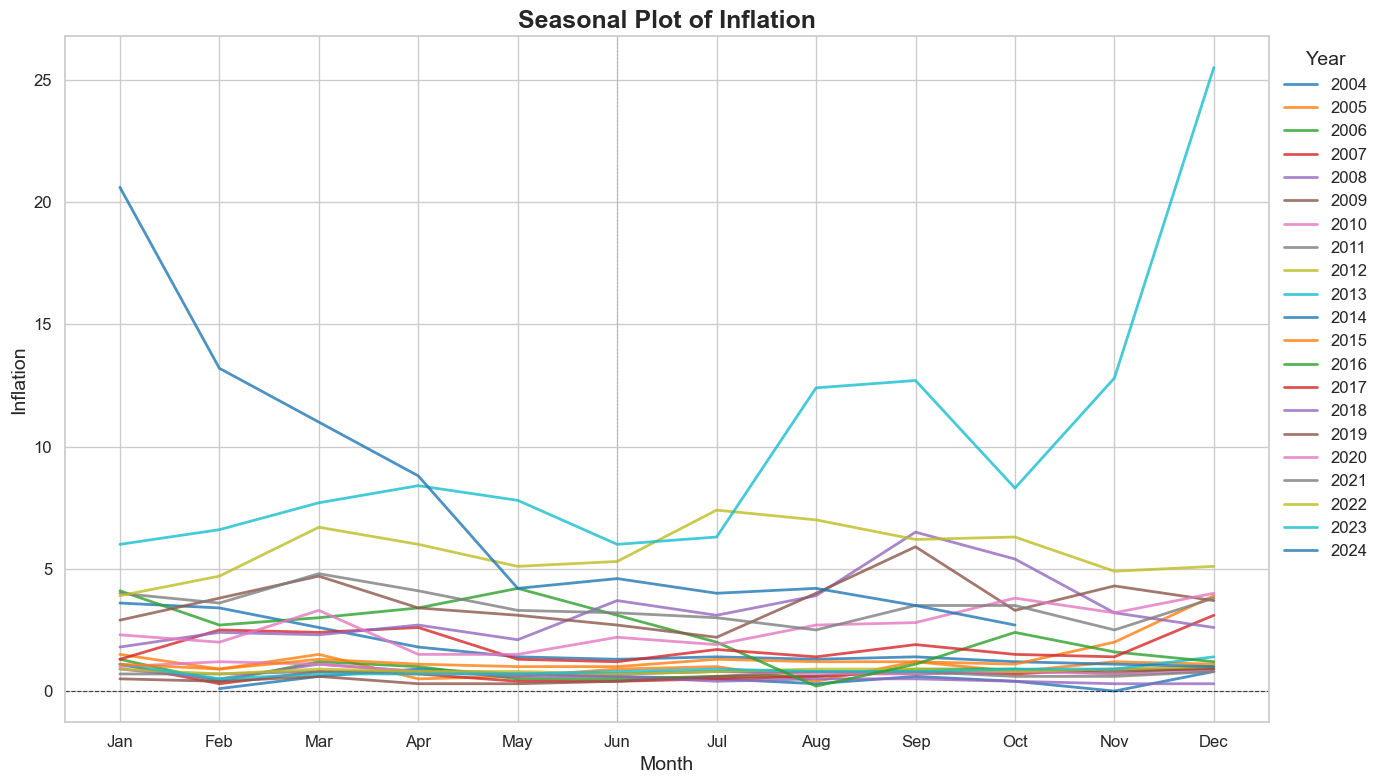

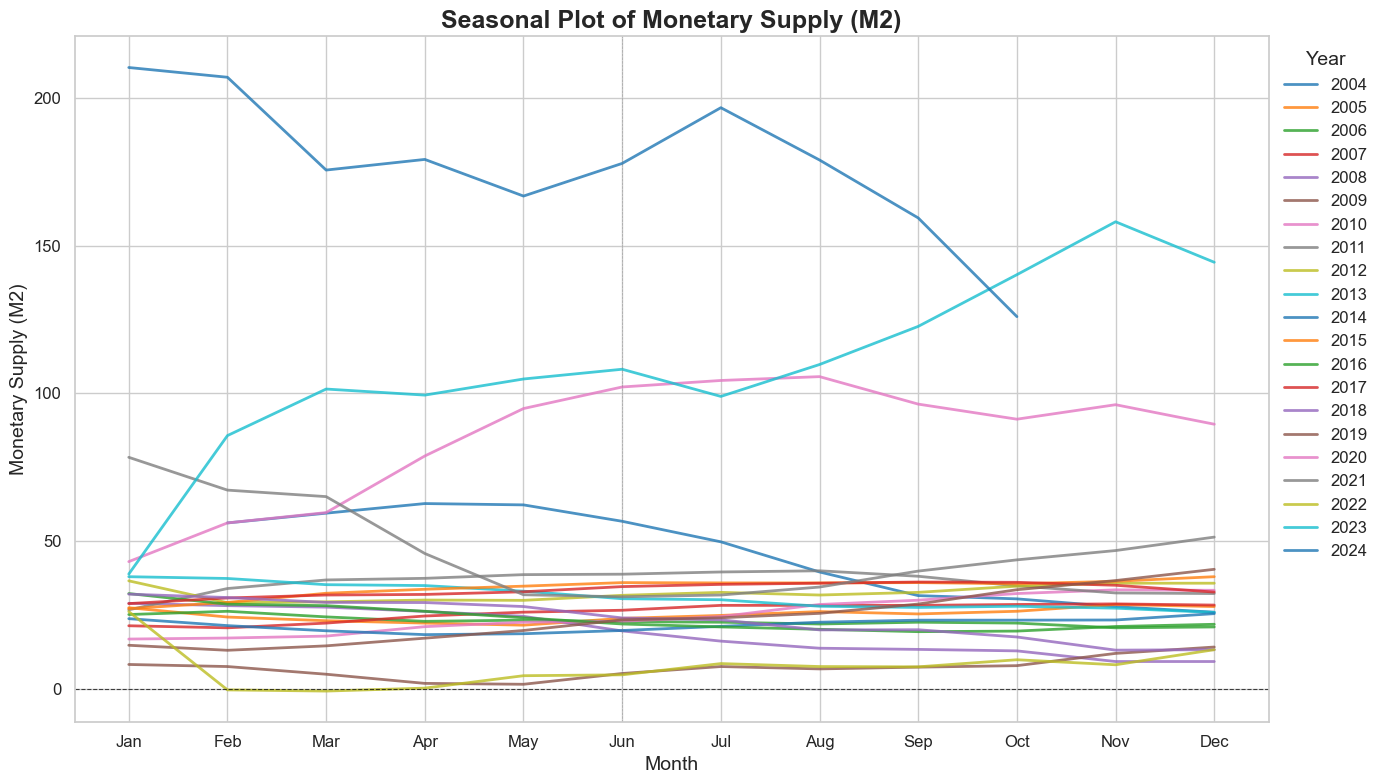

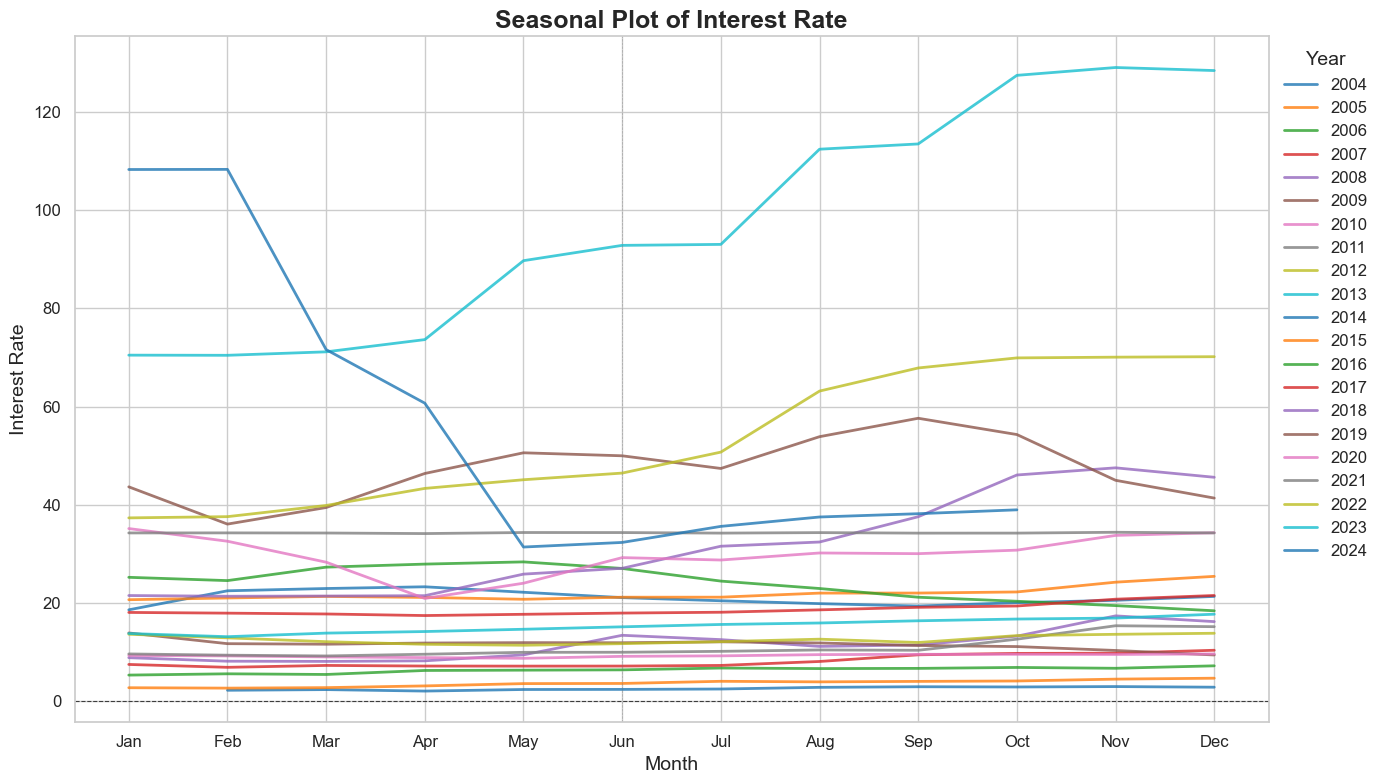

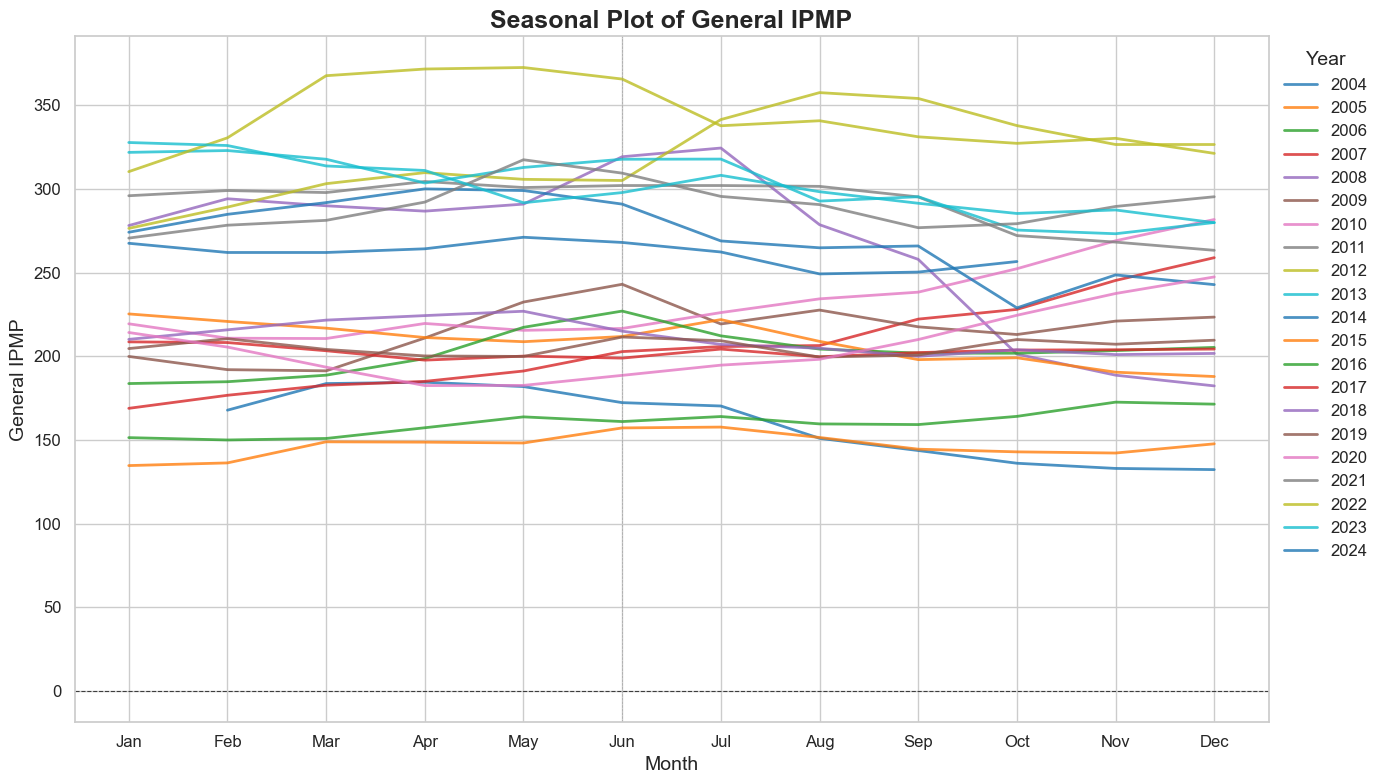

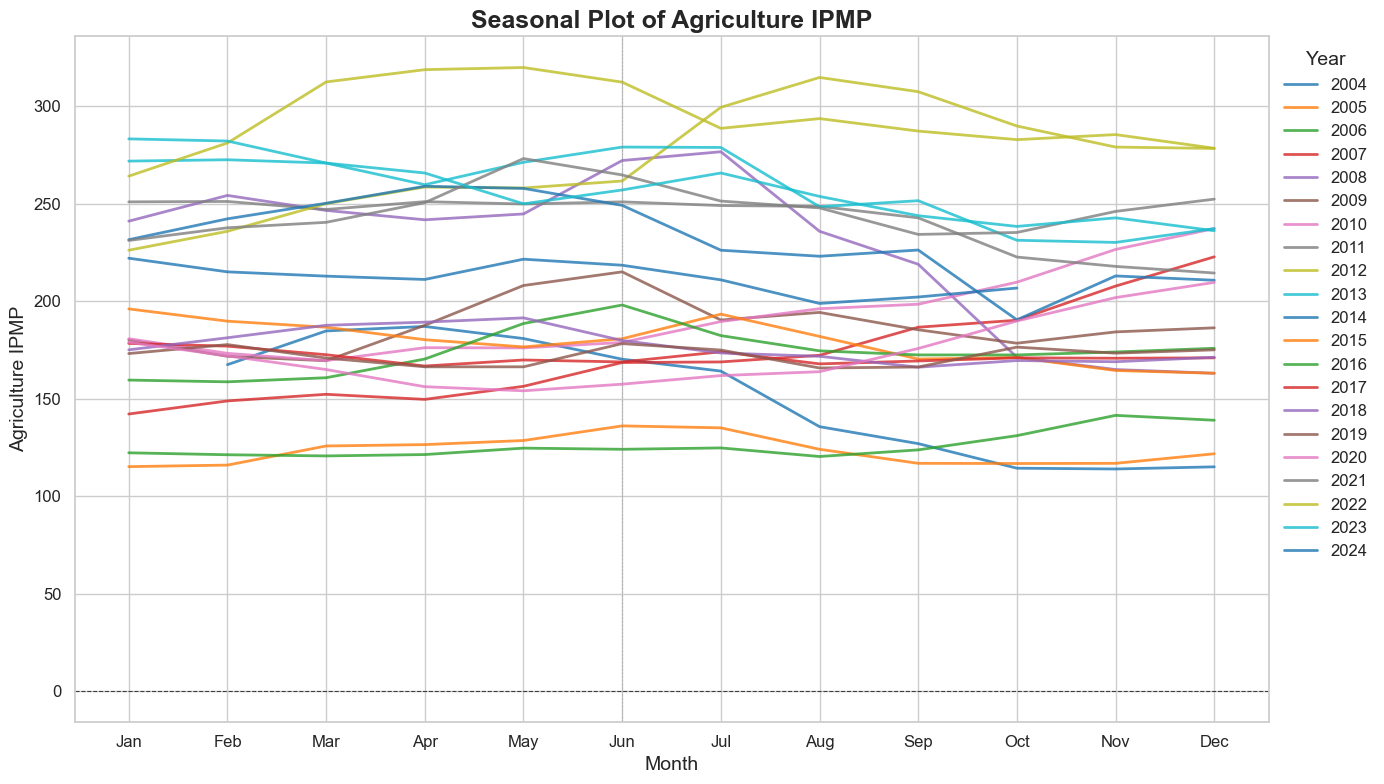

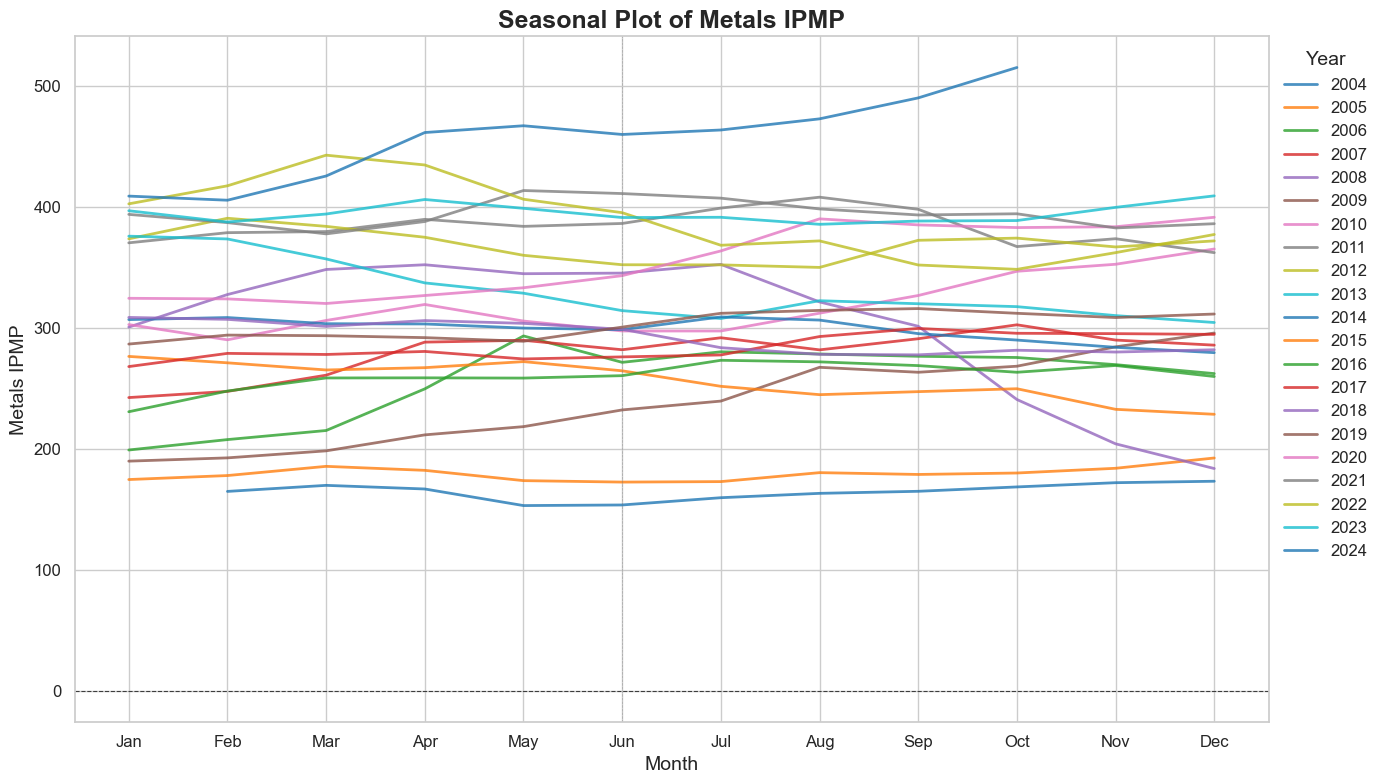

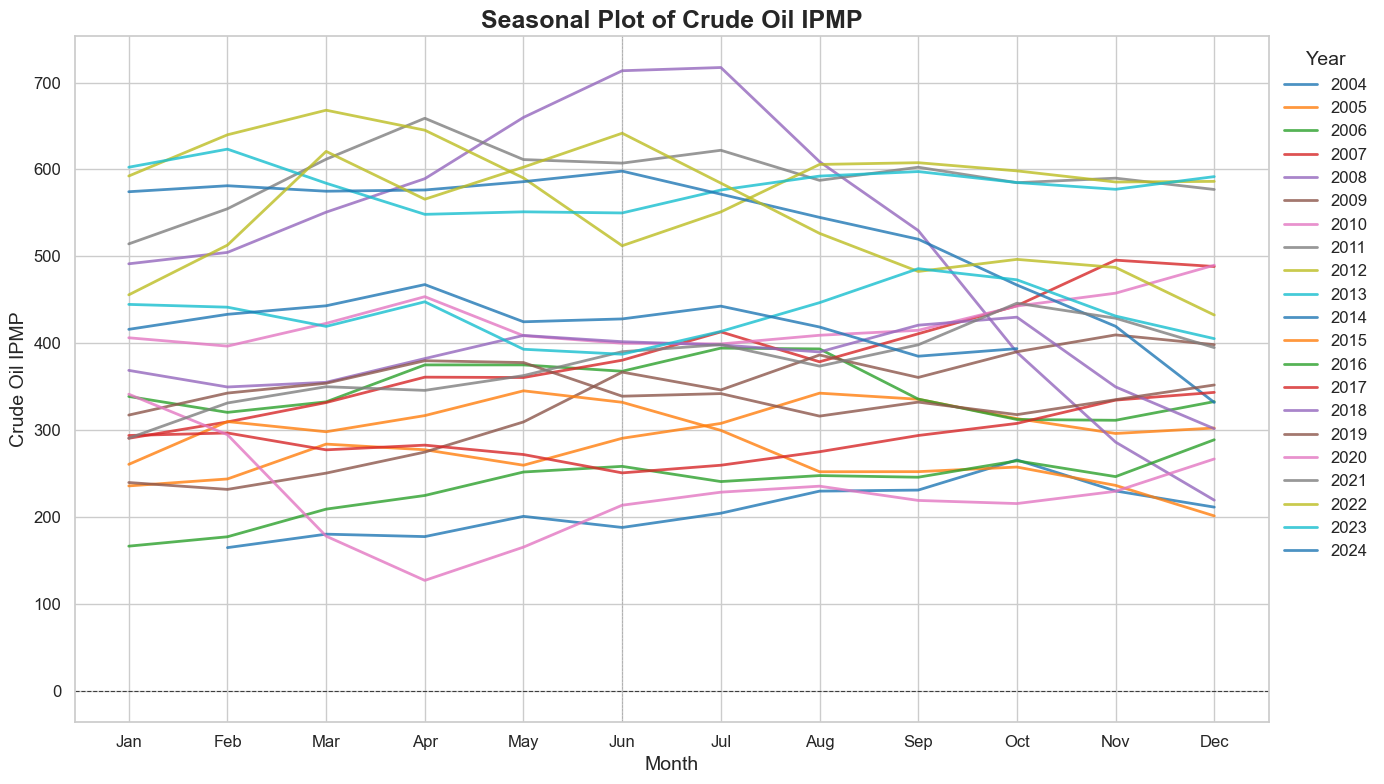

In [11]:
sns.set_theme(style="whitegrid")

data['Year'] = data.index.year

# Seasonal Plot for each variable:
for col in data.columns.drop(['Year', 'Month']):
    plt.figure(figsize=(14, 8))
    
    palette = sns.color_palette("tab10", n_colors=len(data['Year'].unique()))
    
    for i, year in enumerate(sorted(data['Year'].unique())):
        yearly_data = data[data['Year'] == year]
        plt.plot(
            yearly_data['Month'], 
            yearly_data[col], 
            label=f"{year}", 
            color=palette[i], 
            linewidth=2, 
            alpha=0.8
        )

    plt.title(f"Seasonal Plot of {col}", fontsize=18, fontweight='bold')
    plt.xlabel("Month", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks(
        ticks=range(1, 13), 
        labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        fontsize=12
    )
    plt.yticks(fontsize=12)
    
    plt.legend(
        title="Year", 
        loc='upper left', 
        bbox_to_anchor=(1, 1), 
        fontsize=12, 
        title_fontsize=14, 
        frameon=False
    )
    
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.7)
    plt.axvline(6, color='gray', linewidth=0.5, linestyle='--', alpha=0.5) 
    
    plt.tight_layout()
    plt.show()



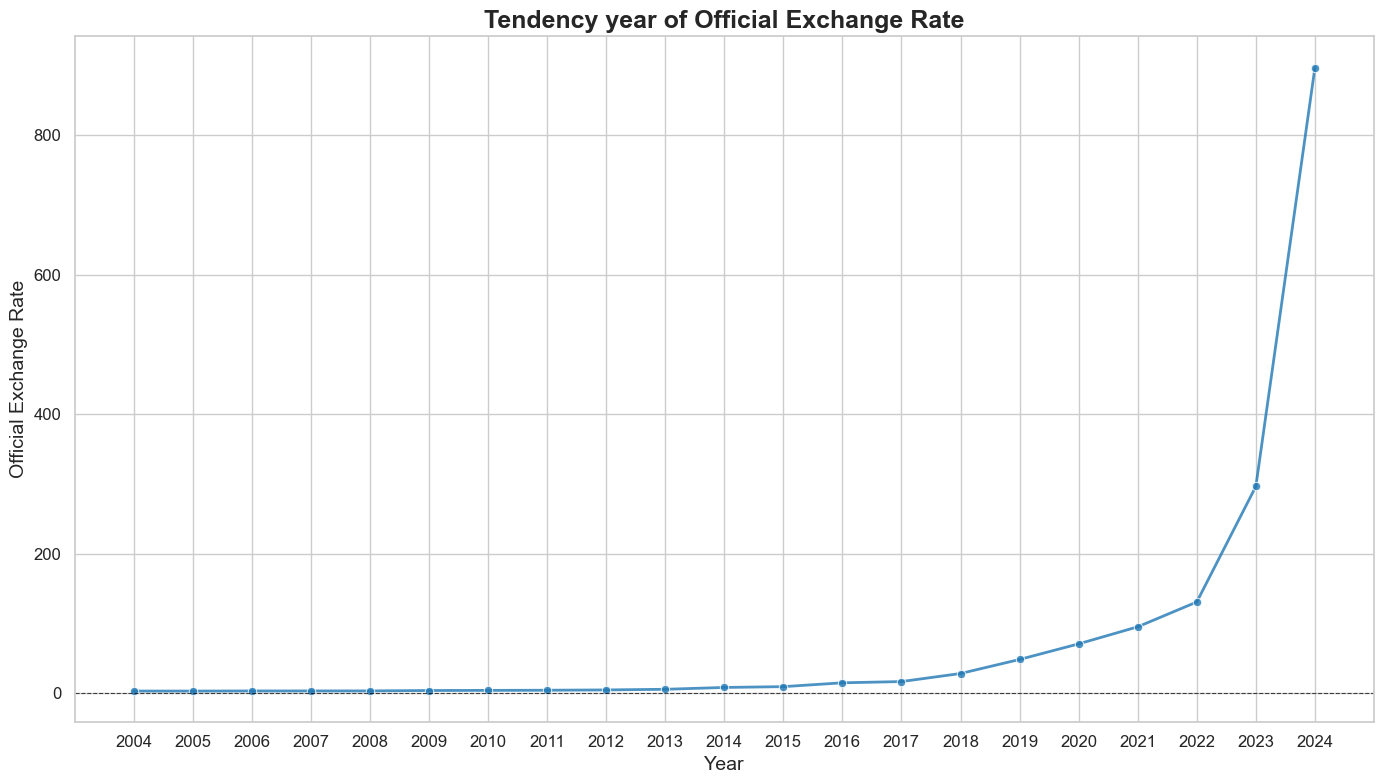

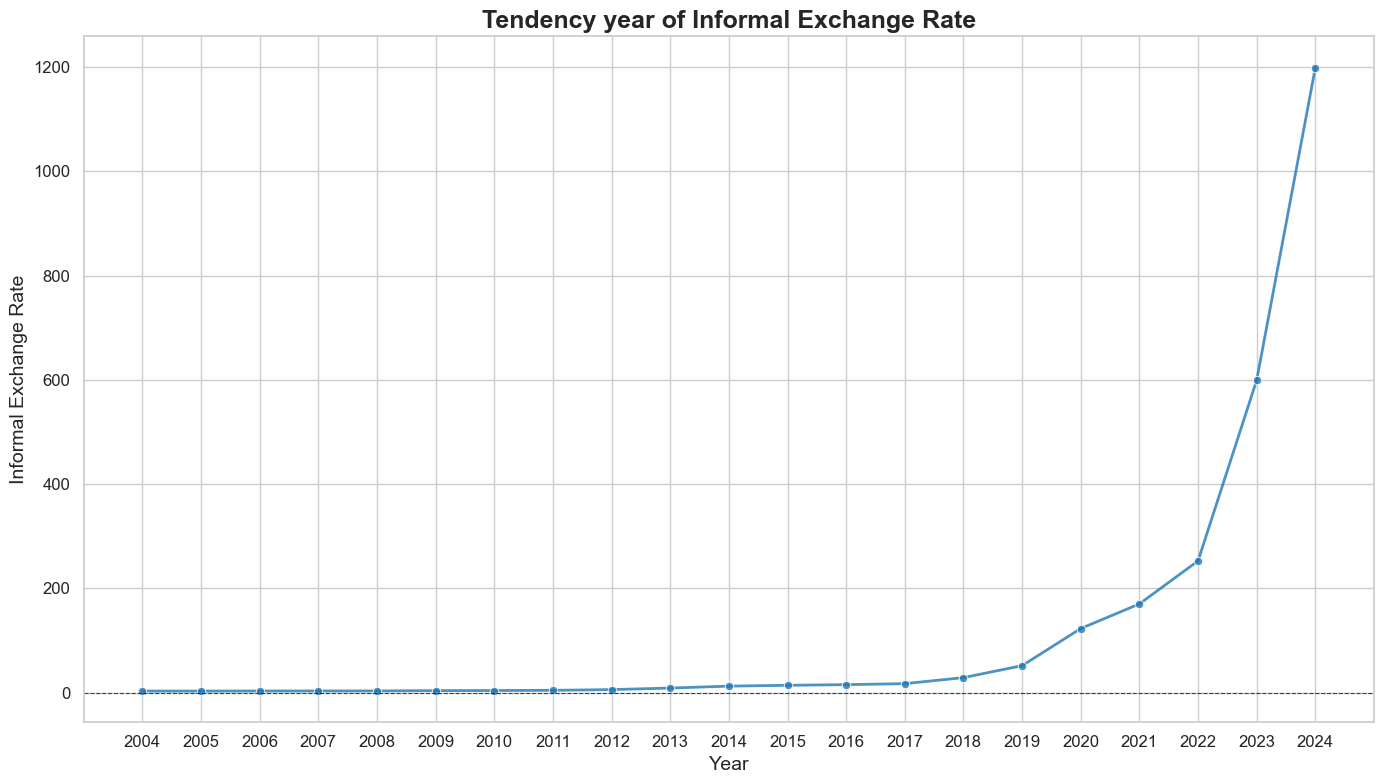

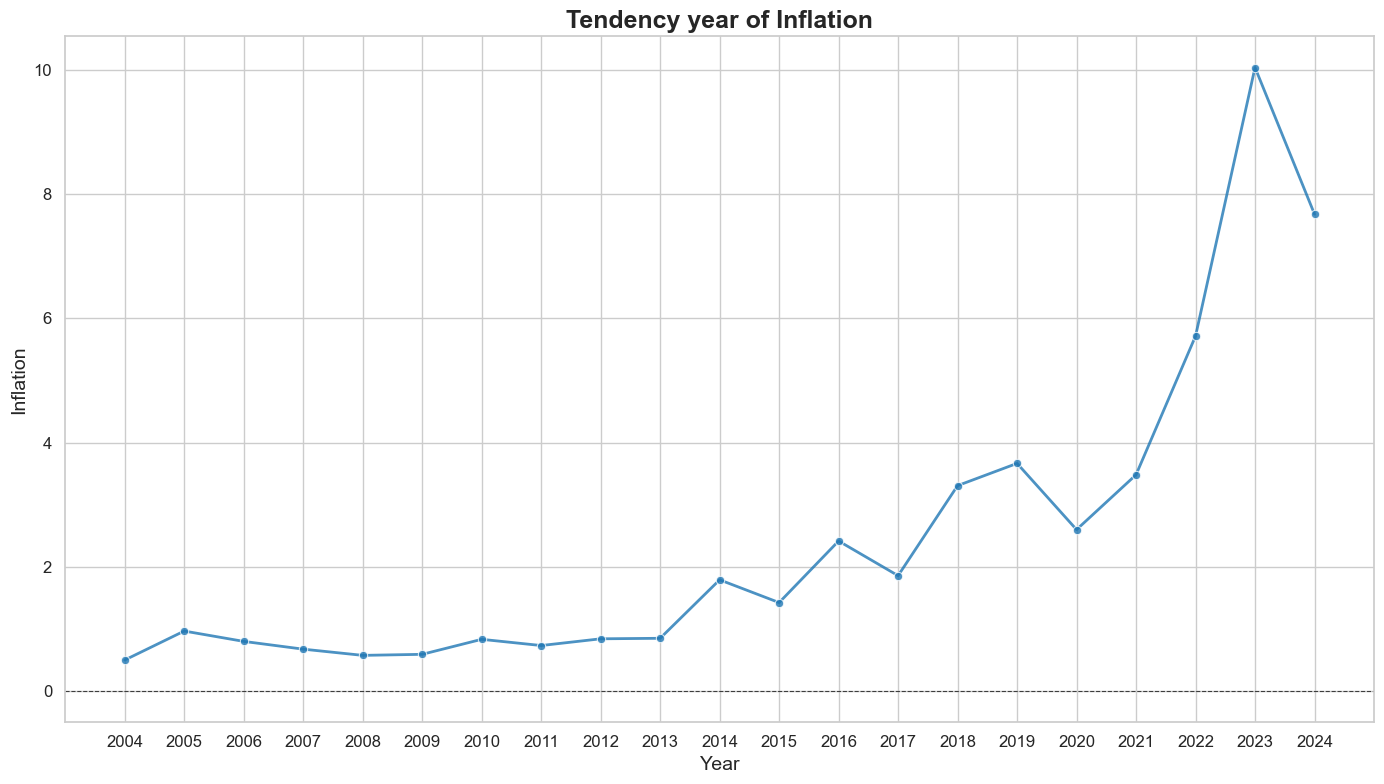

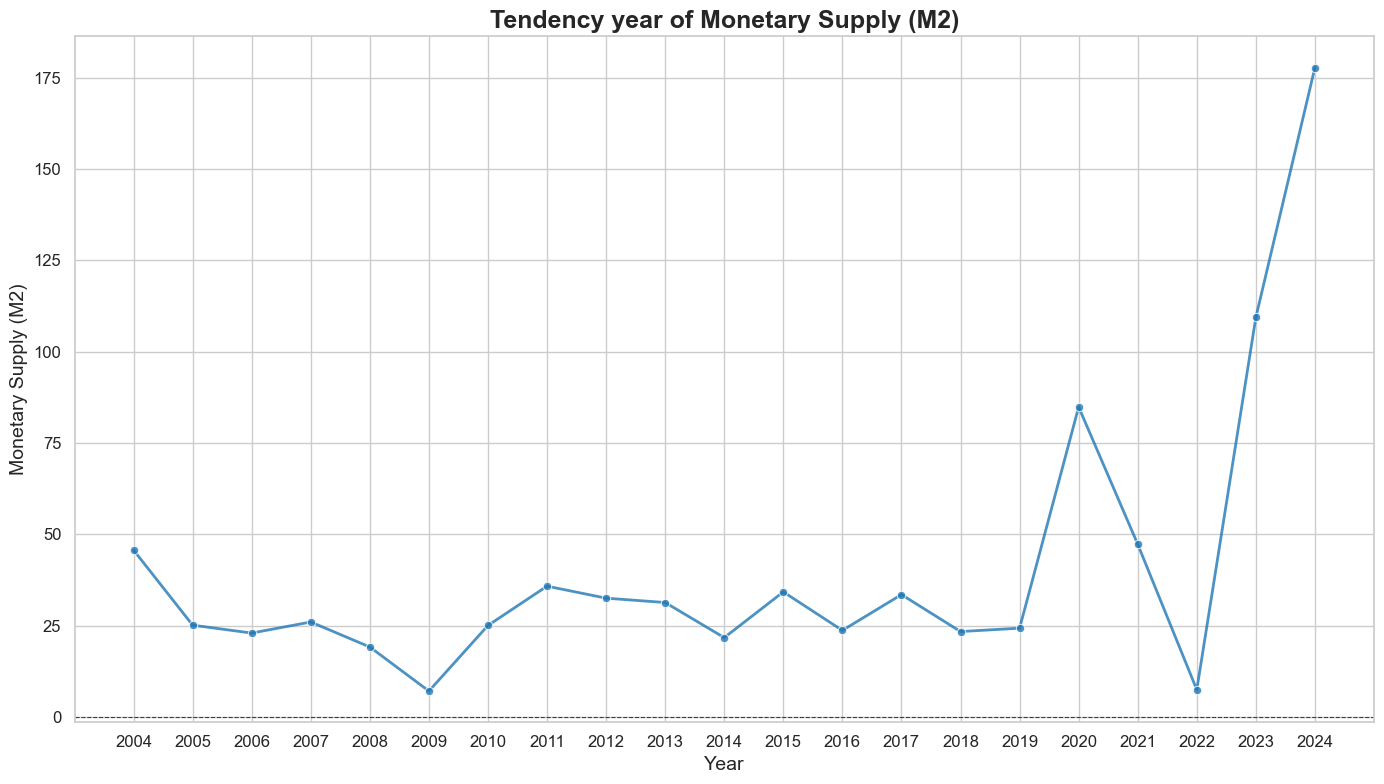

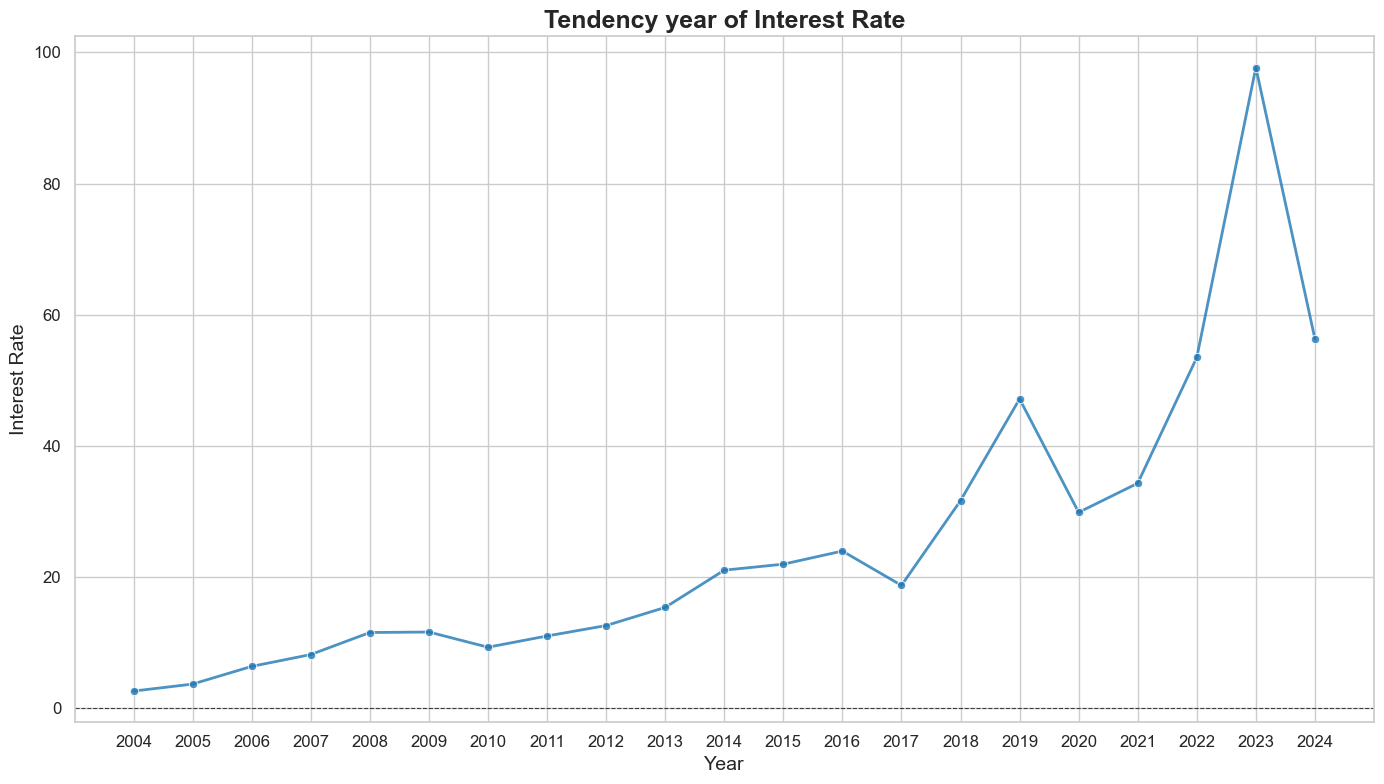

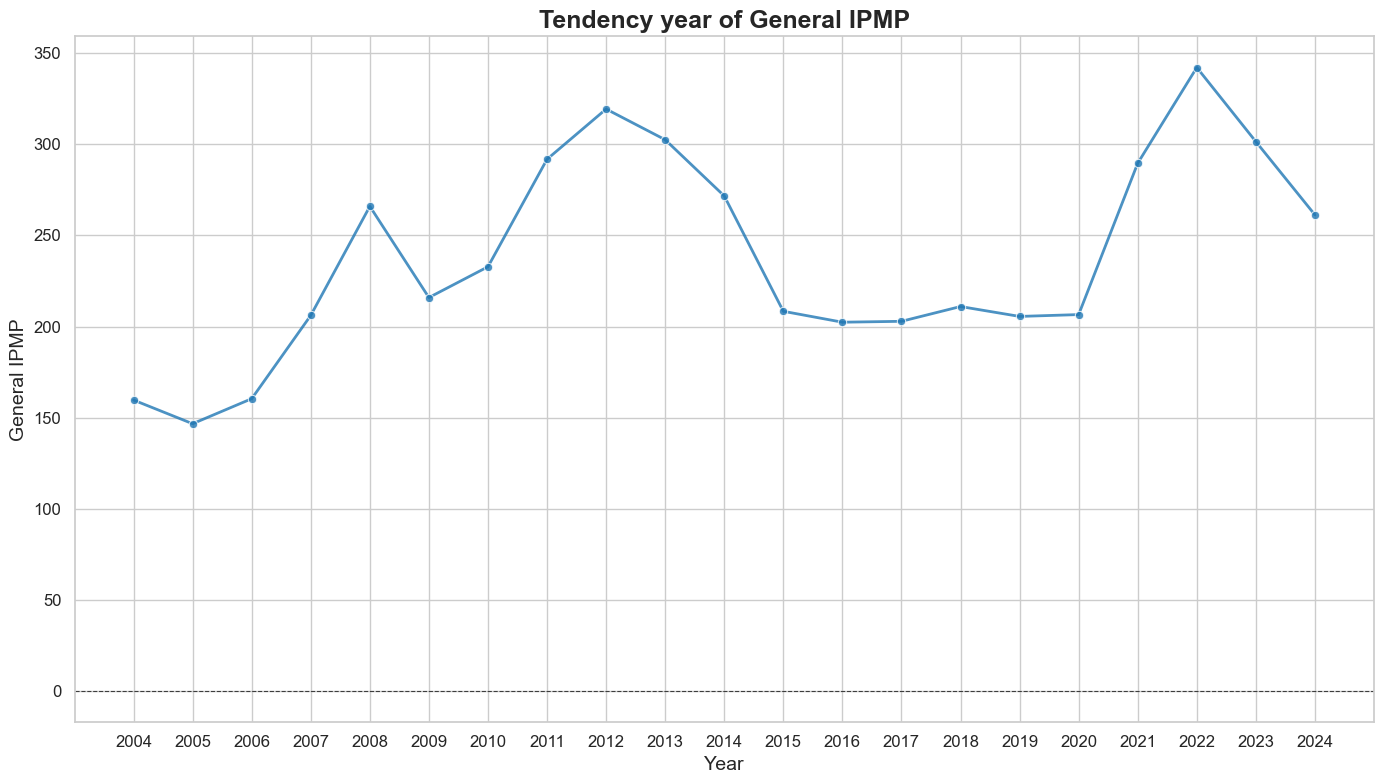

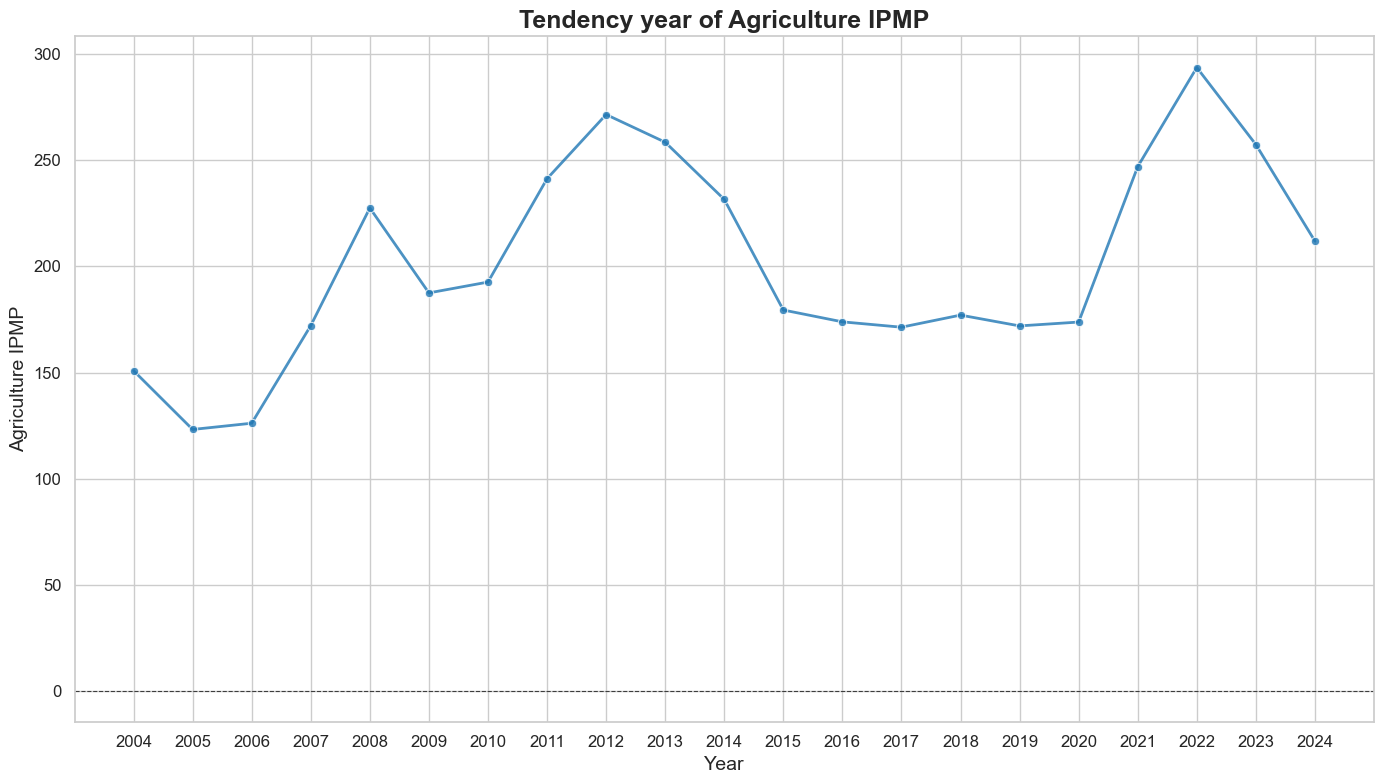

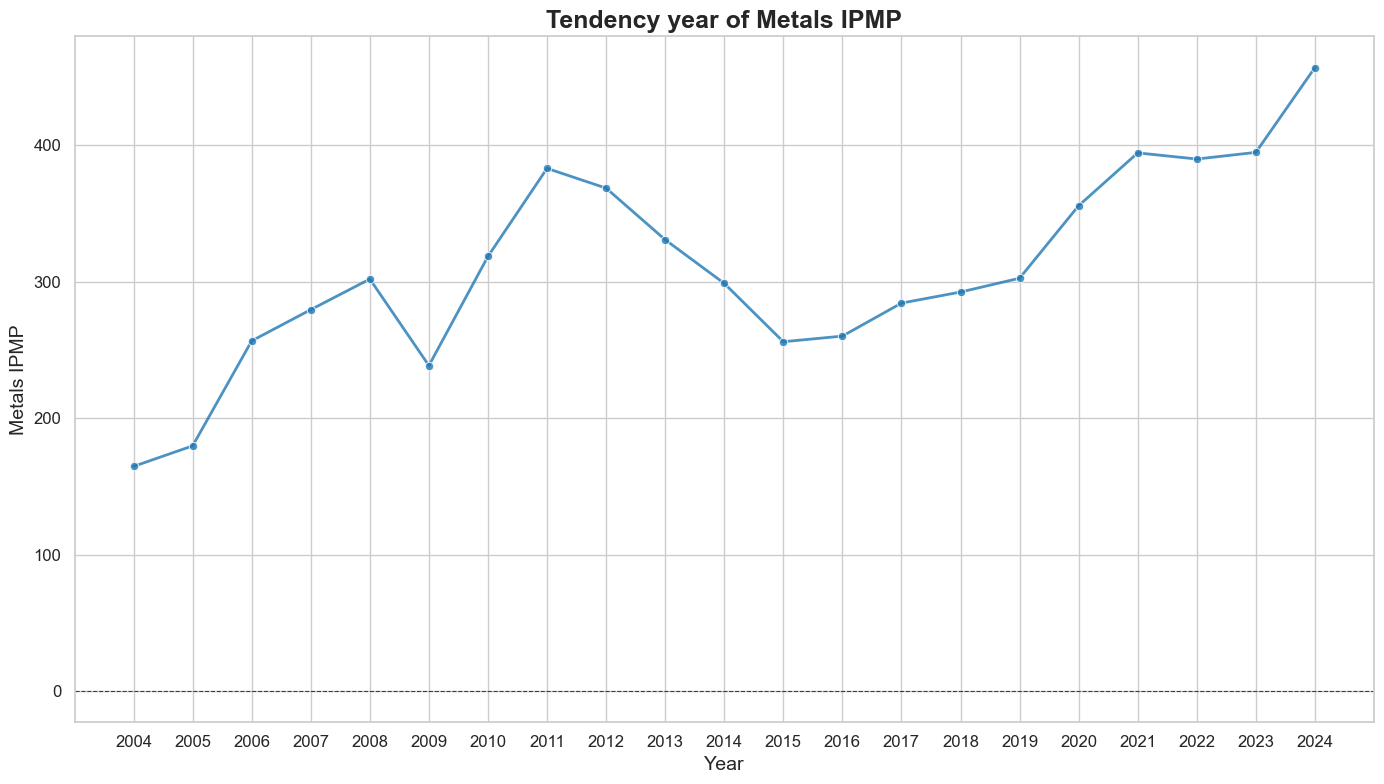

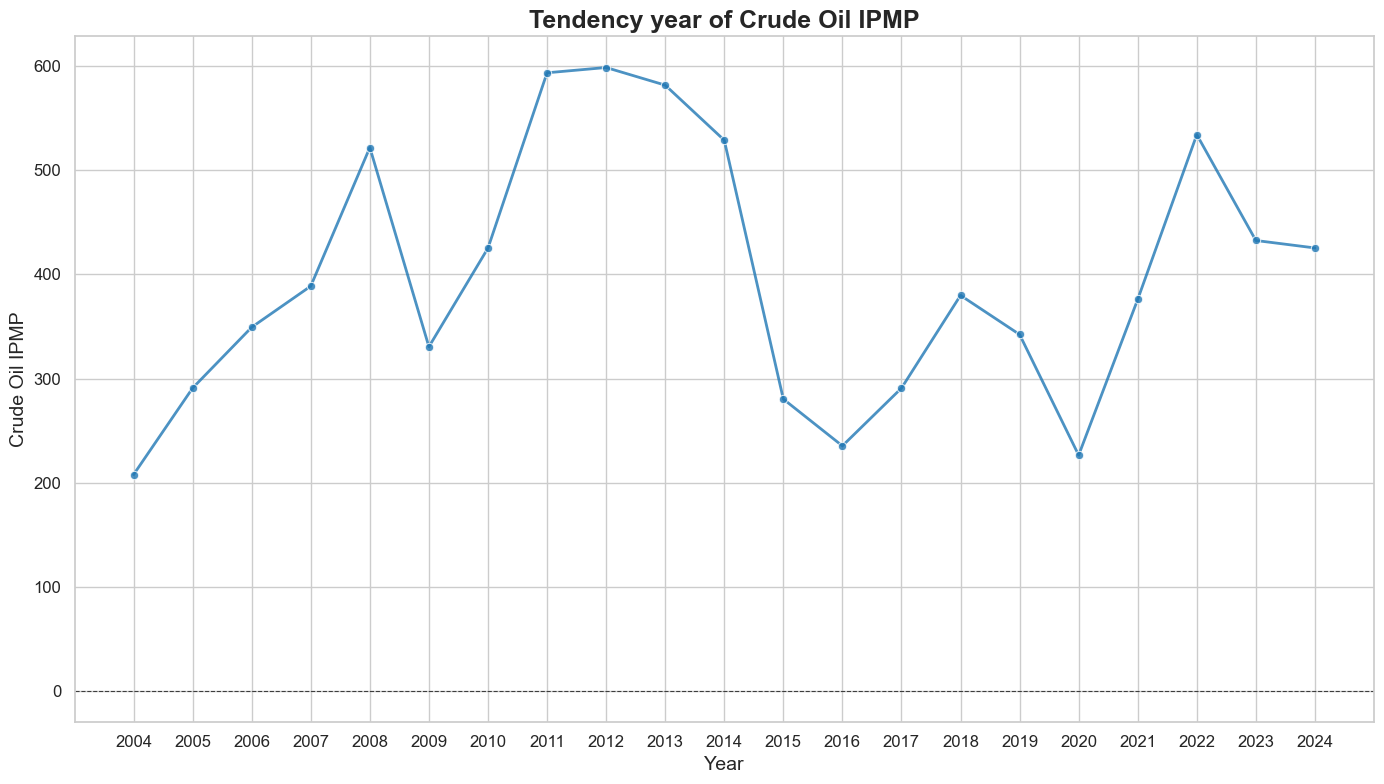

In [12]:
sns.set_theme(style="whitegrid")

aggregated_data = data.groupby('Year').mean()
aggregated_data.drop("Month", inplace=True, axis=1)

for col in aggregated_data.columns:
    plt.figure(figsize=(14, 8))
    
    # Tendency lines:
    sns.lineplot(
        x=aggregated_data.index, 
        y=aggregated_data[col], 
        marker="o", 
        color="tab:blue", 
        linewidth=2, 
        alpha=0.8
    )
    
    plt.title(f"Tendency year of {col}", fontsize=18, fontweight='bold')
    plt.xlabel("Year", fontsize=14)
    plt.ylabel(col, fontsize=14)
    
    plt.xticks(
        ticks=aggregated_data.index, 
        labels=aggregated_data.index.astype(int), 
        fontsize=12
    )
    plt.yticks(fontsize=12)
    
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


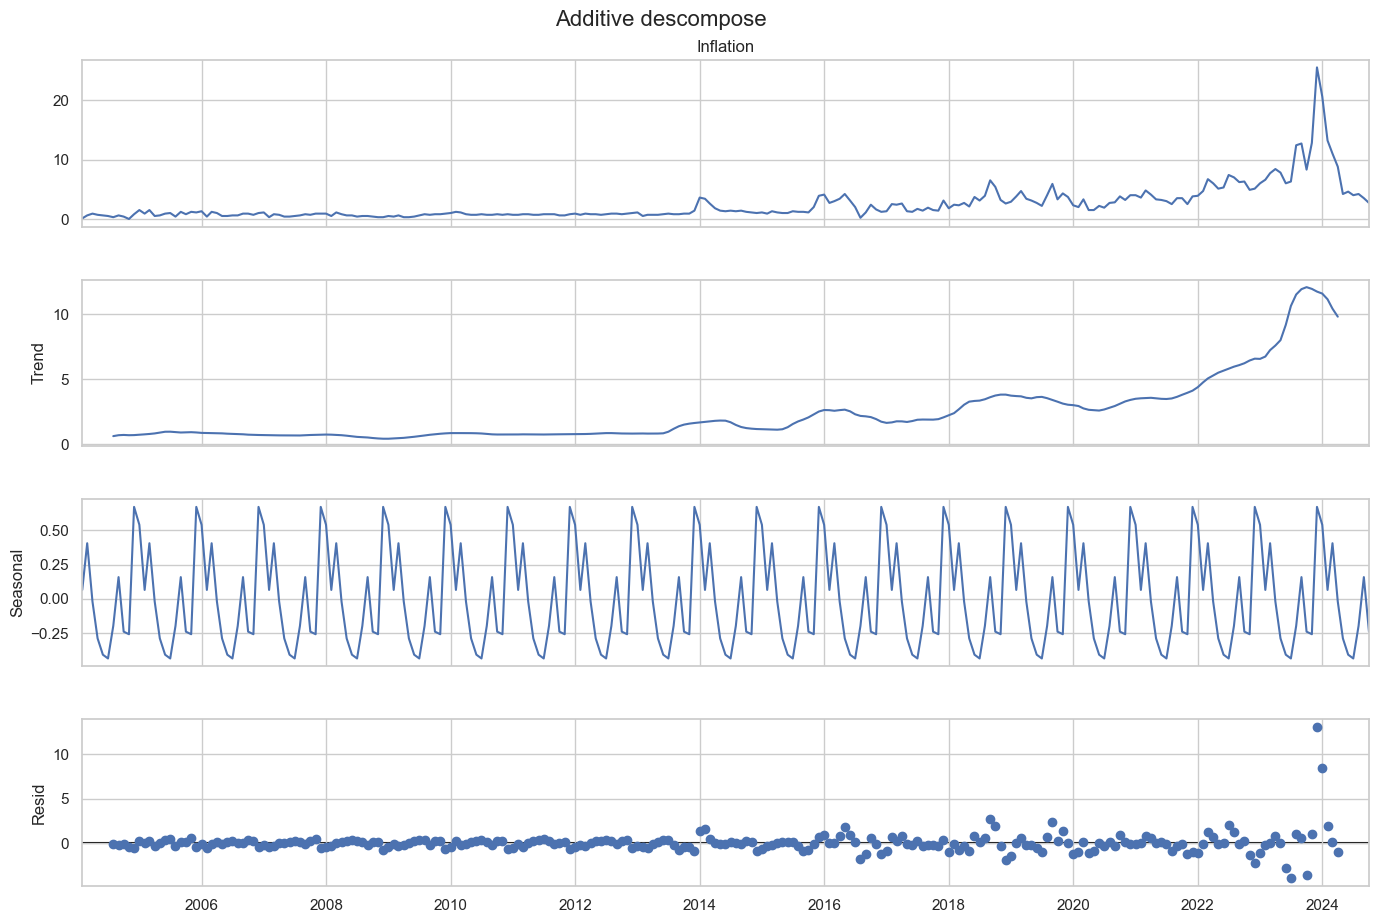

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive descompose:
result_add = seasonal_decompose(data['Inflation'], model='additive', period=12)
fig = result_add.plot()
fig.set_size_inches(15, 10)
plt.suptitle("Additive descompose", fontsize=16, y=0.97)
plt.show()

# Multiplicative descompose:: ValueError: Multiplicative seasonality is not appropriate for zero and negative values
# result_mul = seasonal_decompose(data['Inflation'], model='multiplicative', period=12)
# result_mul.plot()
# plt.suptitle("Multiplicative descompose")
# plt.show()


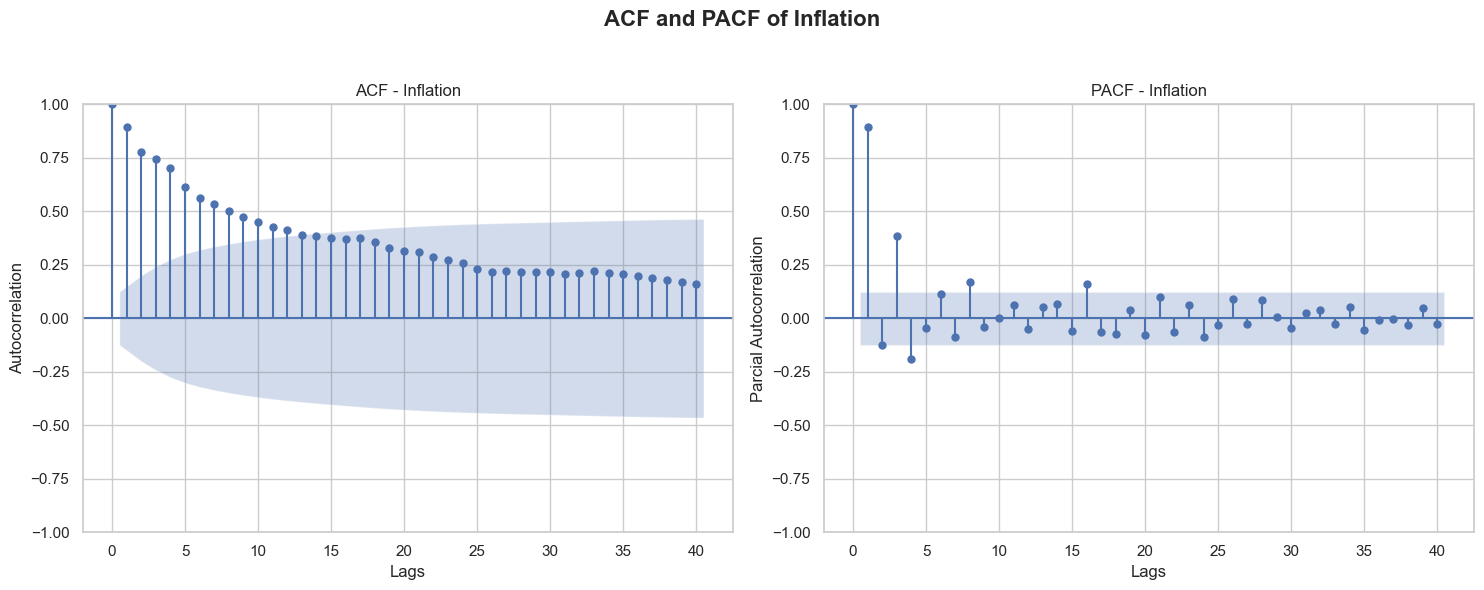

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

target = "Inflation"

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f"ACF and PACF of {target}", fontsize=16, fontweight="bold")

plot_acf(data[target].dropna(), ax=axes[0], lags=40, title=f"ACF - {target}")
axes[0].set_xlabel("Lags")
axes[0].set_ylabel("Autocorrelation")

# Graficar PACF
plot_pacf(data[target].dropna(), ax=axes[1], lags=40, title=f"PACF - {target}", method="ywm")
axes[1].set_xlabel("Lags")
axes[1].set_ylabel("Parcial Autocorrelation")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [15]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tools.sm_exceptions import InterpolationWarning
import warnings

# Ignore InterpolationWarning
warnings.filterwarnings("ignore", category=InterpolationWarning)

from statsmodels.tsa.stattools import adfuller, kpss

def test_stationarity(series):
    # Dickey-Fuller test Aumented:
    adf_result = adfuller(series.dropna())
    adf_statistic = adf_result[0]
    adf_pvalue = adf_result[1]
    adf_conclusion = adf_pvalue <= 0.05  # True if stationary

    # KPSS Test:
    kpss_result, _, _, crit = kpss(series.dropna(), regression='c')
    kpss_statistic = kpss_result
    kpss_conclusion = kpss_statistic < crit['5%']  # True if stationary

    # Print results
    print(f"ADF Statistic: {adf_statistic:.4f}")
    print(f"p-value: {adf_pvalue:.4f}")
    print("Conclusion: The series is stationary" if adf_conclusion else "Conclusion: The series is NOT stationary")

    print(f"\nKPSS Statistic: {kpss_statistic:.4f}")
    print("Conclusion: The series is stationary" if kpss_conclusion else "Conclusion: The series is NOT stationary")
    
    # Return the results
    return {
        "adf_statistic": adf_statistic,
        "adf_pvalue": adf_pvalue,
        "adf_conclusion": adf_conclusion,
        "kpss_statistic": kpss_statistic,
        "kpss_conclusion": kpss_conclusion,
        "critical_values": crit
    }

# Checking stationary over the target:
test_stationarity(data['Inflation'])


ADF Statistic: 1.6664
p-value: 0.9980
Conclusion: The series is NOT stationary

KPSS Statistic: 1.5211
Conclusion: The series is NOT stationary


{'adf_statistic': np.float64(1.6663965550460111),
 'adf_pvalue': np.float64(0.9980437099560796),
 'adf_conclusion': np.False_,
 'kpss_statistic': np.float64(1.5211046870511025),
 'kpss_conclusion': np.False_,
 'critical_values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}}

In [16]:
#Take the first diff of the serie:
data['inflation_diff'] = data['Inflation'].diff()

#And then check if it is stationary:
test_stationarity(data['inflation_diff'])

ADF Statistic: -4.7090
p-value: 0.0001
Conclusion: The series is stationary

KPSS Statistic: 0.0427
Conclusion: The series is stationary


{'adf_statistic': np.float64(-4.709031267850733),
 'adf_pvalue': np.float64(8.092613656108617e-05),
 'adf_conclusion': np.True_,
 'kpss_statistic': np.float64(0.04270638135243445),
 'kpss_conclusion': np.True_,
 'critical_values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}}

In [17]:
#And if we take the log of the serie?
data['inflation_log'] = np.log(data['Inflation'] + 1)
test_stationarity(data['inflation_log'])


ADF Statistic: -0.1775
p-value: 0.9411
Conclusion: The series is NOT stationary

KPSS Statistic: 1.9512
Conclusion: The series is NOT stationary


{'adf_statistic': np.float64(-0.17751968987370273),
 'adf_pvalue': np.float64(0.9411486993557329),
 'adf_conclusion': np.False_,
 'kpss_statistic': np.float64(1.9511505011457133),
 'kpss_conclusion': np.False_,
 'critical_values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}}

In [18]:
from scipy.stats import boxcox

# BoxCox Transformation:
# Some values are negatives so we need to add a constant value to turn them possitives:
constant = abs(data['Inflation'].min()) + 1
data['inflation_positive'] = data['Inflation'] + constant

# Aplicar Box-Cox
data['inflation_boxcox'], lambda_boxcox = boxcox(data['inflation_positive'])
test_stationarity(data['inflation_boxcox'])


ADF Statistic: -0.5635
p-value: 0.8790
Conclusion: The series is NOT stationary

KPSS Statistic: 2.1294
Conclusion: The series is NOT stationary


{'adf_statistic': np.float64(-0.5634757232611738),
 'adf_pvalue': np.float64(0.8790233091612085),
 'adf_conclusion': np.False_,
 'kpss_statistic': np.float64(2.1293605734751333),
 'kpss_conclusion': np.False_,
 'critical_values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}}

---

In [19]:
#Dropping unusable columns:
data.drop(['Month','Year','inflation_positive','inflation_boxcox','inflation_log'], axis=1, inplace=True)

In [20]:
#Checking stationarity over the independient variables:
non_stationary_series = []

for col in data.columns.drop(['Inflation']):
    print(f"Testing stationarity for: {col}")
    result = test_stationarity(data[col])
    print(result)
    print("\n" + "-"*50 + "\n")
    
    is_adf_stationary = result["adf_conclusion"]  # True if is stationary based on ADF
    is_kpss_stationary = result["kpss_conclusion"]  # True if is stationary based on  KPSS
    
    # If the column doesn't pass both test, then is considerer non stationary:
    if not (is_adf_stationary and is_kpss_stationary):
        non_stationary_series.append(col)

Testing stationarity for: Official Exchange Rate
ADF Statistic: -0.2190
p-value: 0.9362
Conclusion: The series is NOT stationary

KPSS Statistic: 0.9340
Conclusion: The series is NOT stationary
{'adf_statistic': np.float64(-0.2189700647641072), 'adf_pvalue': np.float64(0.9362223365122023), 'adf_conclusion': np.False_, 'kpss_statistic': np.float64(0.933956218890834), 'kpss_conclusion': np.False_, 'critical_values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}}

--------------------------------------------------

Testing stationarity for: Informal Exchange Rate
ADF Statistic: 4.1811
p-value: 1.0000
Conclusion: The series is NOT stationary

KPSS Statistic: 1.0346
Conclusion: The series is NOT stationary
{'adf_statistic': np.float64(4.181135526796373), 'adf_pvalue': 1.0, 'adf_conclusion': False, 'kpss_statistic': np.float64(1.0346376722259134), 'kpss_conclusion': np.False_, 'critical_values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}}

-----------------------------

In [21]:
# Aplicar diferenciación solo a las series no estacionarias
for col in non_stationary_series:
    data[f"{col}_diff"] = data[col].diff()

# Eliminar filas con NaN generadas por la diferenciación
data.dropna(inplace=True)

In [22]:
data.head()

,Official Exchange Rate,Informal Exchange Rate,Inflation,Monetary Supply (M2),Interest Rate,General IPMP,Agriculture IPMP,Metals IPMP,Crude Oil IPMP,inflation_diff,Official Exchange Rate_diff,Informal Exchange Rate_diff,Monetary Supply (M2)_diff,Interest Rate_diff,General IPMP_diff,Agriculture IPMP_diff,Metals IPMP_diff
2004-03-01,2.8976,2.92,0.6,59.50,2.40,183.7,184.7,169.9,180.5,0.5,-0.0343,-0.02,3.30,0.135,15.9,17.3,5.0
2004-04-01,2.8359,2.84,0.9,62.75,2.10,184.5,187.0,166.9,177.7,0.3,-0.0617,-0.08,3.25,-0.300,0.8,2.3,-3.0
2004-05-01,2.9197,2.93,0.7,62.30,2.42,181.9,180.8,153.2,201.0,-0.2,0.0838,0.09,-0.45,0.320,-2.6,-6.2,-13.7
2004-06-01,2.9603,2.97,0.6,56.75,2.44,172.3,170.2,153.7,188.2,-0.1,0.0406,0.04,-5.55,0.020,-9.6,-10.6,0.5
2004-07-01,2.9552,2.96,0.5,49.80,2.52,170.3,164.1,159.7,204.6,-0.1,-0.0051,-0.01,-6.95,0.080,-2.0,-6.1,6.0


In [23]:
data_diff = data.drop(['Official Exchange Rate','Informal Exchange Rate',
                       'Inflation','Monetary Supply (M2)','Interest Rate',
                       'General IPMP','Agriculture IPMP','Metals IPMP'],
                      axis=1)

In [24]:
data_diff.head()

,Crude Oil IPMP,inflation_diff,Official Exchange Rate_diff,Informal Exchange Rate_diff,Monetary Supply (M2)_diff,Interest Rate_diff,General IPMP_diff,Agriculture IPMP_diff,Metals IPMP_diff
2004-03-01,180.5,0.5,-0.0343,-0.02,3.30,0.135,15.9,17.3,5.0
2004-04-01,177.7,0.3,-0.0617,-0.08,3.25,-0.300,0.8,2.3,-3.0
2004-05-01,201.0,-0.2,0.0838,0.09,-0.45,0.320,-2.6,-6.2,-13.7
2004-06-01,188.2,-0.1,0.0406,0.04,-5.55,0.020,-9.6,-10.6,0.5
2004-07-01,204.6,-0.1,-0.0051,-0.01,-6.95,0.080,-2.0,-6.1,6.0


In [25]:
# Check if the date range it's fully complete on the modified dataframe:
full_date_range = pd.date_range(start=data_diff.index.min(), end=data_diff.index.max(), freq='MS') #MS means first day of the months

missing_dates = set(full_date_range) - set(data_diff.index)
if missing_dates:
    print("Dates missing:")
    print(sorted(missing_dates))
else:
    print("No missing dates.")

No missing dates.


In [26]:
# From DataFrame to CSV file:
data_diff.to_csv("../data/external/stationary_data.csv")